# Analysis

In [1]:
import pandas as pd

# Read the CSV files into DataFrames
df_f1000 = pd.read_csv('f1000research.csv')
df_sw = pd.read_csv('semantic-web-journal-analysis.csv')

In [6]:
df_f1000

paper_id            reviewer  \
0      https://f1000research.com/articles/11-565/v1     Daniel A Nation   
1      https://f1000research.com/articles/11-565/v1    Ahmet Turan Isik   
2      https://f1000research.com/articles/13-277/v2      Mansoor Rahman   
3     https://f1000research.com/articles/13-1238/v1   Dr. Talal Shihayb   
4     https://f1000research.com/articles/13-1238/v1          Nancy Ajwa   
...                                             ...                 ...   
9477      https://f1000research.com/articles/1-3/v1   Peter N. Robinson   
9478      https://f1000research.com/articles/1-3/v1  Christian Gilissen   
9479      https://f1000research.com/articles/1-1/v1  Suzanne Gaudreault   
9480      https://f1000research.com/articles/1-1/v1      Nigel Livesley   
9481      https://f1000research.com/articles/1-1/v1        Carlos Morel   

      review_date           review_suggestion  length_words  \
0     19 Jan 2023                    Approved           278   
1     27 Sep 2024  Approved With Reservations           181   
2     23 Dec 2024  Approved With Reservations           158   
3     04 Nov 2024  Approved With Reservations          1128   
4     26 Dec 2024                    Approved           295   
...           ...                         ...           ...   
9477  23 Jul 2012                    Approved           666   
9478  26 Jul 2012                    Approved           432   
9479  17 Jul 2012                    Approved           270   
9480  27 Jul 2012                Not Approved           633   
9481  02 Aug 2012                    Approved            33   

                                                  title  \
0     Assessing the role of vascular risk factors in...   
1     Assessing the role of vascular risk factors in...   
2     Impact of yoga on the central and peripheral v...   
3     Do more pregnancies increase the risk of perio...   
4     Do more pregnancies increase the risk of perio...   
...                                                 ...   
9477  Low budget analysis of Direct-To-Consumer geno...   
9478  Low budget analysis of Direct-To-Consumer geno...   
9479  Knowledge of specific HIV transmission modes i...   
9480  Knowledge of specific HIV transmission modes i...   
9481  Knowledge of specific HIV transmission modes i...   

                                               abstract  days_to_submit  \
0     Background:  Although observational studies de...             240   
1     Background:  Although observational studies de...             857   
2     Background The aim of this study was to observ...             227   
3     Background Hormonal changes in pregnancy and t...              19   
4     Background Hormonal changes in pregnancy and t...              71   
...                                                 ...             ...   
9477  Direct-to-consumer (DTC) genetic testing is a ...               7   
9478  Direct-to-consumer (DTC) genetic testing is a ...              10   
9479  Background: In prior research, Africans who kn...               4   
9480  Background: In prior research, Africans who kn...              14   
9481  Background: In prior research, Africans who kn...              20   

                                            review_text   mattr  ...  \
0     This is a meta-analysis of mendelian randomiza...  0.7832  ...   
1     I have reviewed the manuscript "Assessing the ...  0.7663  ...   
2     Is the work clearly and accurately presented a...  0.7591  ...   
3     The authors assessed the effects of number of ...  0.7783  ...   
4     The current structure provides a good foundati...  0.7944  ...   
...                                                 ...     ...  ...   
9477  23andMe and several other companies have been ...  0.7865  ...   
9478  This is a well written and interesting article...  0.7506  ...   
9479  This is an interesting article, and I think it...  0.7999  ...   
9480  This paper has a number of serious flaws.a) Th...

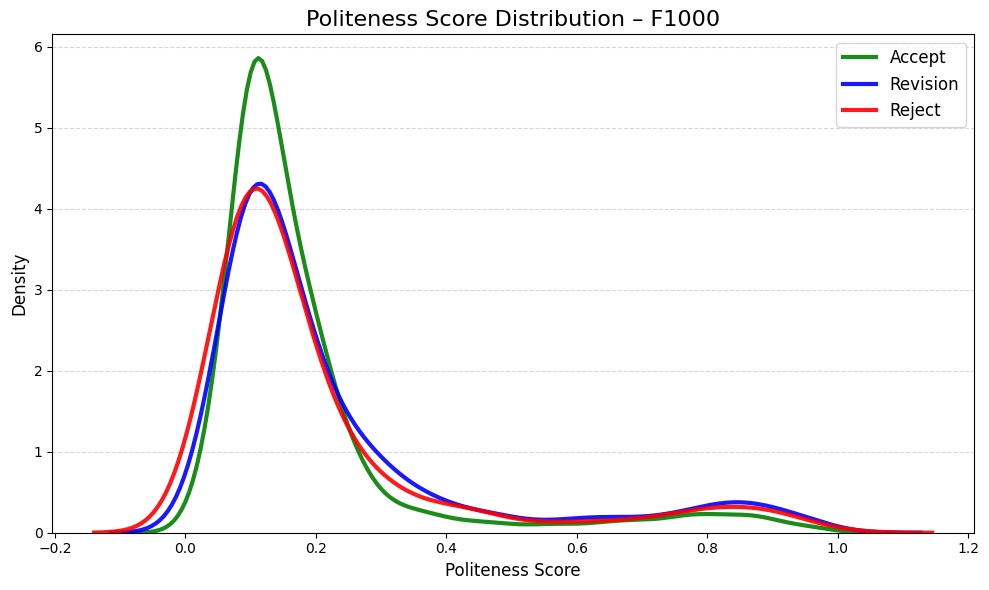

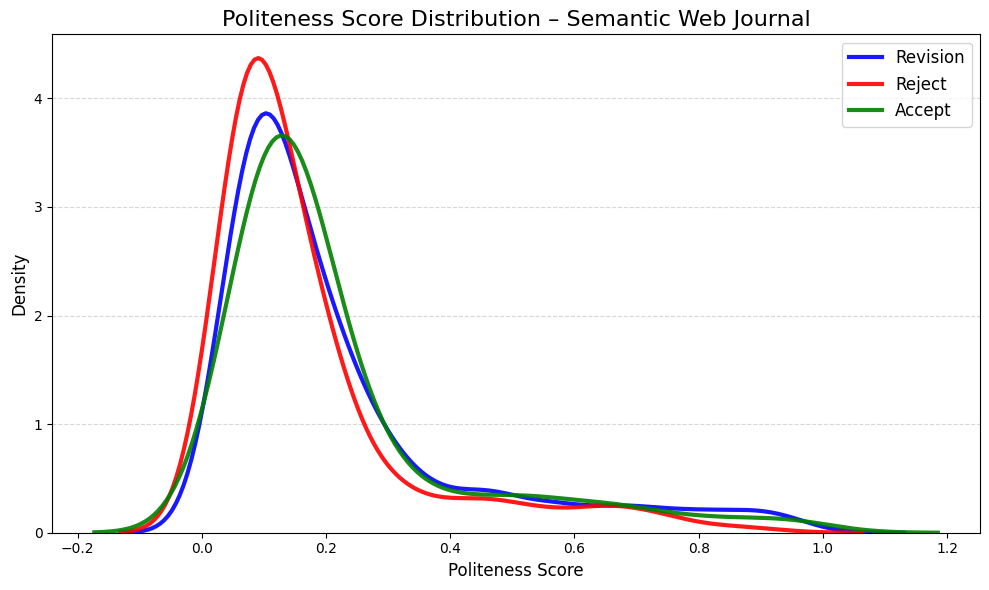

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mapping for review suggestions
review_mapping = {
    'Approved': 'Accept',
    'Not Approved': 'Reject',
    'Approved With Reservations': 'Revision',
    'Minor Revision': 'Revision',
    'Major Revision': 'Revision',
    'Accept': 'Accept',
    'Reject': 'Reject'
}

df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

# Apply the mapping and filter to the three categories for both dataframes
for df_name in ['df_f1000', 'df_sw']:
    df = globals()[df_name].copy()
    df['review_suggestion'] = df['review_suggestion'].replace(review_mapping)
    df = df[df['review_suggestion'].isin(['Accept', 'Reject', 'Revision'])].copy()
    globals()[df_name] = df

# Compute per-sample weights based on the new categories
for df in (df_f1000, df_sw):
    counts = df.groupby('review_suggestion')['review_suggestion'].transform('count')
    df['weight'] = 1.0 / counts  # Each group sums to 1

# Updated color map for the three categories
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

# Define the plotting function with the new color map
def plot_politeness_distribution(df, title):
    plt.figure(figsize=(10, 6))
    for suggestion in df['review_suggestion'].unique():
        subset = df[df['review_suggestion'] == suggestion]
        kwargs = {'color': color_map[suggestion]} if suggestion in color_map else {}
        sns.kdeplot(
            data=subset,
            x='Politeness',
            label=suggestion,
            weights=subset['weight'],
            fill=False,
            alpha=0.9,
            linewidth=3,
            **kwargs
        )
    plt.title(f"Politeness Score Distribution – {title}", fontsize=16)
    plt.xlabel("Politeness Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Generate the plots
plot_politeness_distribution(df_f1000, 'F1000')
plot_politeness_distribution(df_sw, 'Semantic Web Journal')

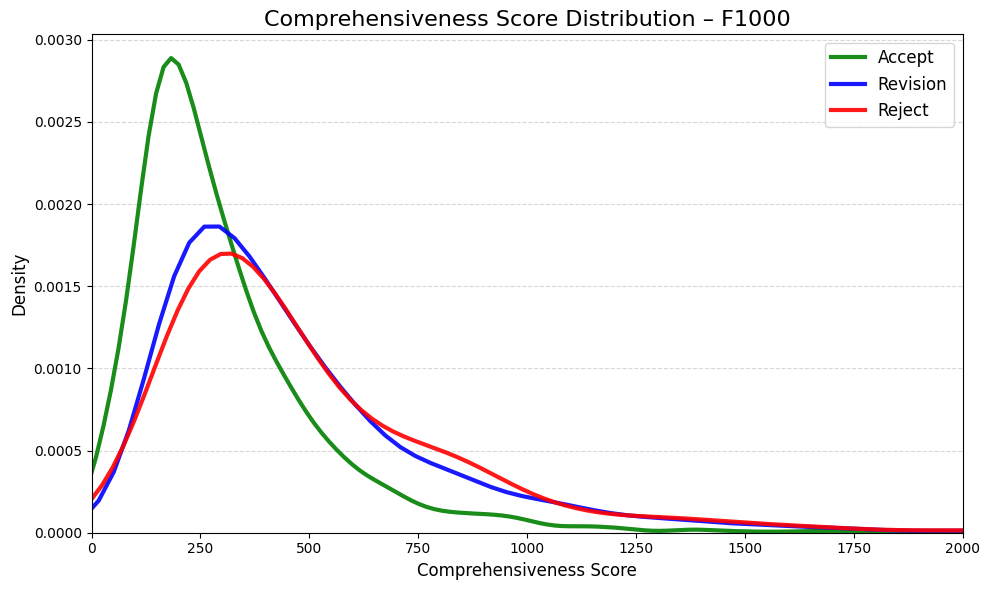

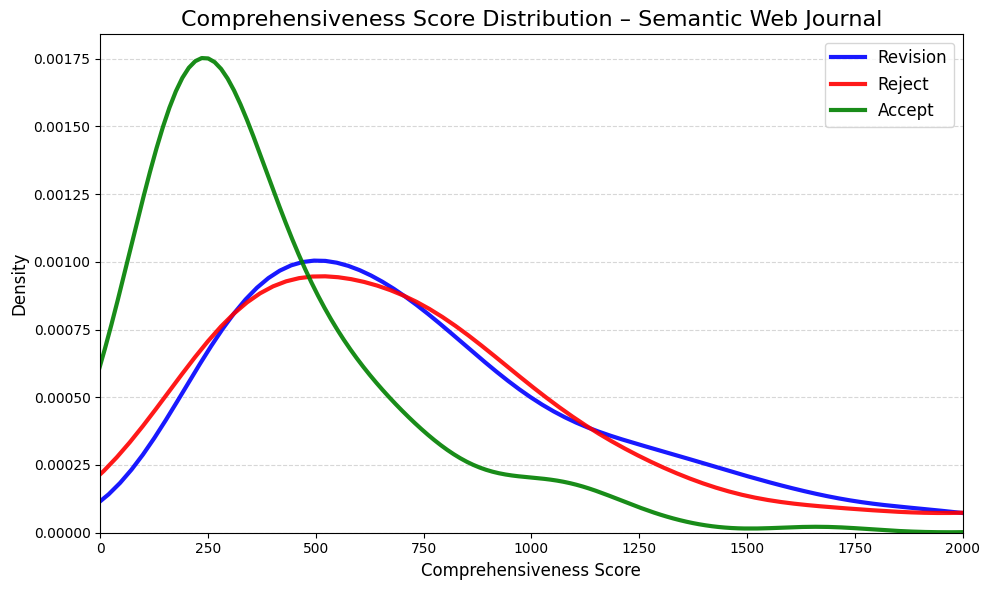

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mapping for review suggestions
review_mapping = {
    'Approved': 'Accept',
    'Not Approved': 'Reject',
    'Approved With Reservations': 'Revision',
    'Minor Revision': 'Revision',
    'Major Revision': 'Revision',
    'Accept': 'Accept',
    'Reject': 'Reject'
}

df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

# Apply the mapping and filter to the three categories for both dataframes
for df_name in ['df_f1000', 'df_sw']:
    df = globals()[df_name].copy()
    df['review_suggestion'] = df['review_suggestion'].replace(review_mapping)
    df = df[df['review_suggestion'].isin(['Accept', 'Reject', 'Revision'])].copy()
    globals()[df_name] = df

# Compute per-sample weights based on the new categories
for df in (df_f1000, df_sw):
    counts = df.groupby('review_suggestion')['review_suggestion'].transform('count')
    df['weight'] = 1.0 / counts  # Each group sums to 1

# Updated color map for the three categories
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

# Define the plotting function with the new color map
def plot_len_distribution(df, title):
    plt.figure(figsize=(10, 6))
    for suggestion in df['review_suggestion'].unique():
        subset = df[df['review_suggestion'] == suggestion]
        kwargs = {'color': color_map[suggestion]} if suggestion in color_map else {}
        sns.kdeplot(
            data=subset,
            x='Comprehensiveness',
            label=suggestion,
            weights=subset['weight'],
            fill=False,
            alpha=0.9,
            linewidth=3,
            **kwargs
        )
    plt.title(f"Comprehensiveness Score Distribution – {title}", fontsize=16)
    plt.xlabel("Comprehensiveness Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xlim(0, 2000)  # Set x-axis limit to 2000
    plt.tight_layout()
    plt.show()

# Generate the plots
plot_len_distribution(df_f1000, 'F1000')
plot_len_distribution(df_sw, 'Semantic Web Journal')

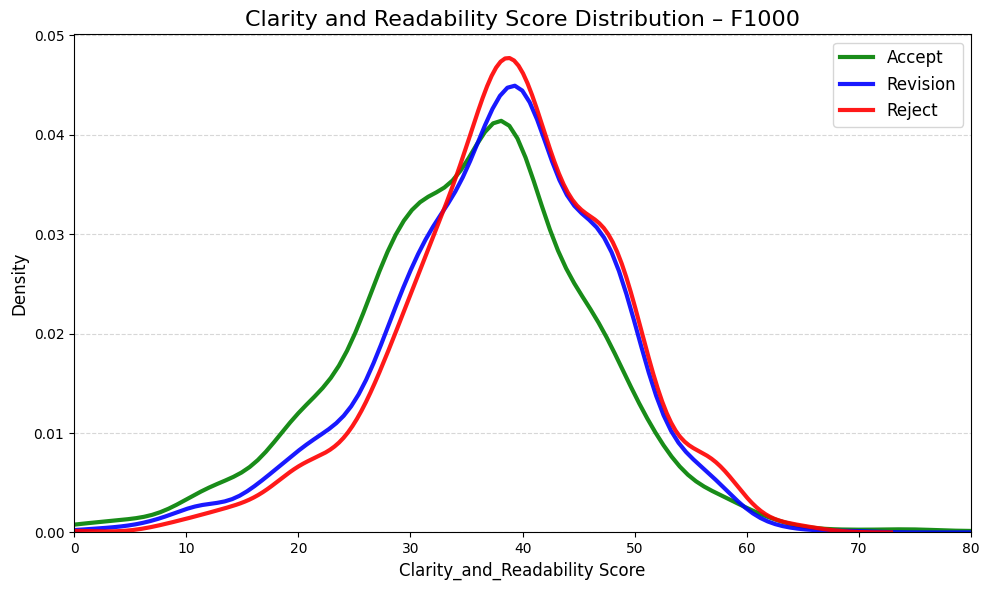

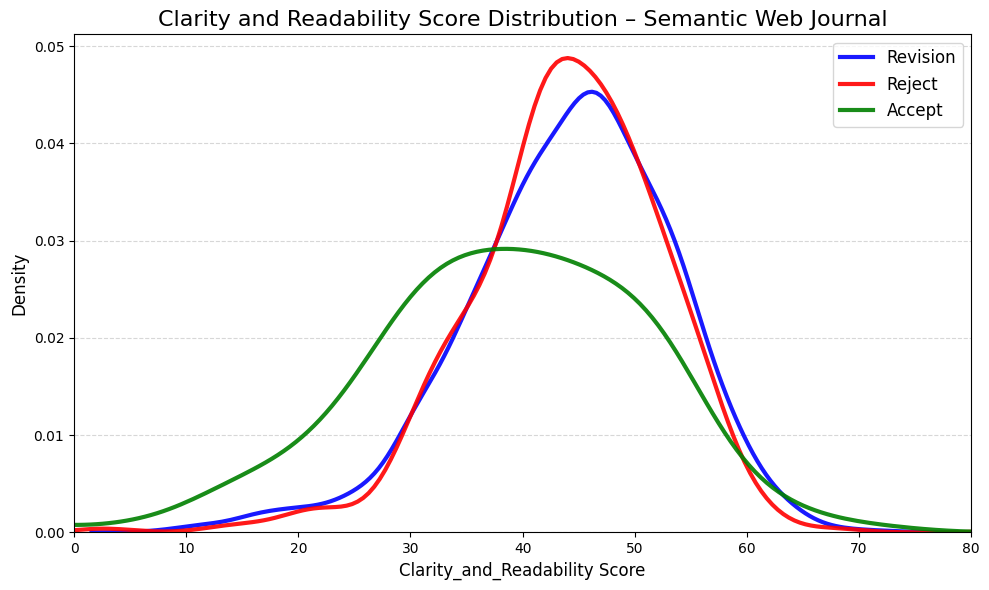

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mapping for review suggestions
review_mapping = {
    'Approved': 'Accept',
    'Not Approved': 'Reject',
    'Approved With Reservations': 'Revision',
    'Minor Revision': 'Revision',
    'Major Revision': 'Revision',
    'Accept': 'Accept',
    'Reject': 'Reject'
}

df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

# Apply the mapping and filter to the three categories for both dataframes
for df_name in ['df_f1000', 'df_sw']:
    df = globals()[df_name].copy()
    df['review_suggestion'] = df['review_suggestion'].replace(review_mapping)
    df = df[df['review_suggestion'].isin(['Accept', 'Reject', 'Revision'])].copy()
    globals()[df_name] = df

# Compute per-sample weights based on the new categories
for df in (df_f1000, df_sw):
    counts = df.groupby('review_suggestion')['review_suggestion'].transform('count')
    df['weight'] = 1.0 / counts  # Each group sums to 1

# Updated color map for the three categories
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

# Define the plotting function with the new color map
def plot_len_distribution(df, title):
    plt.figure(figsize=(10, 6))
    for suggestion in df['review_suggestion'].unique():
        subset = df[df['review_suggestion'] == suggestion]
        kwargs = {'color': color_map[suggestion]} if suggestion in color_map else {}
        sns.kdeplot(
            data=subset,
            x='Clarity_and_Readability',
            label=suggestion,
            weights=subset['weight'],
            fill=False,
            alpha=0.9,
            linewidth=3,
            **kwargs
        )
    plt.title(f"Clarity and Readability Score Distribution – {title}", fontsize=16)
    plt.xlabel("Clarity_and_Readability Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xlim(0, 80)  # Set x-axis limit to 2000
    plt.tight_layout()
    plt.show()

# Generate the plots
plot_len_distribution(df_f1000, 'F1000')
plot_len_distribution(df_sw, 'Semantic Web Journal')

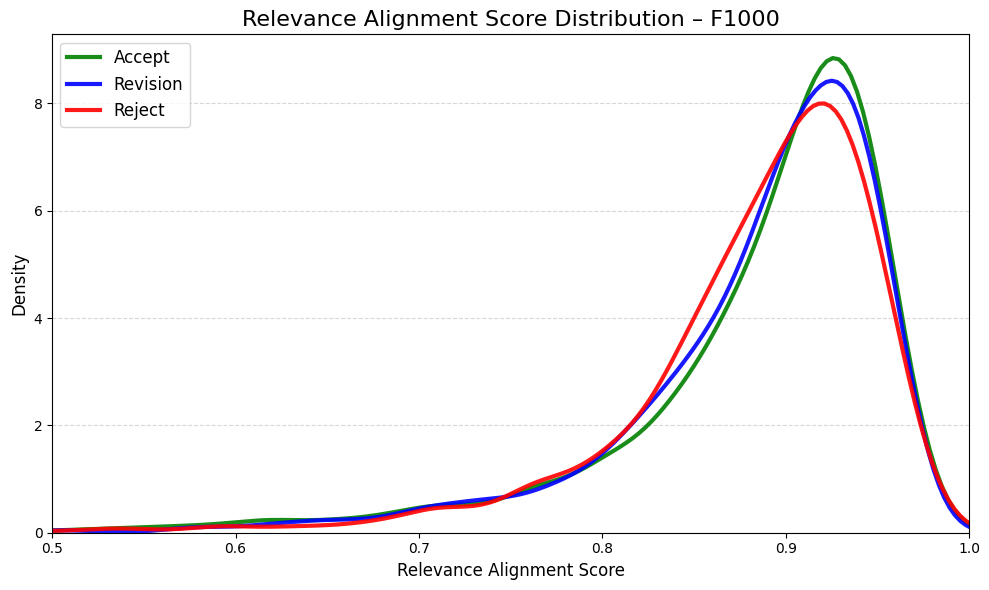

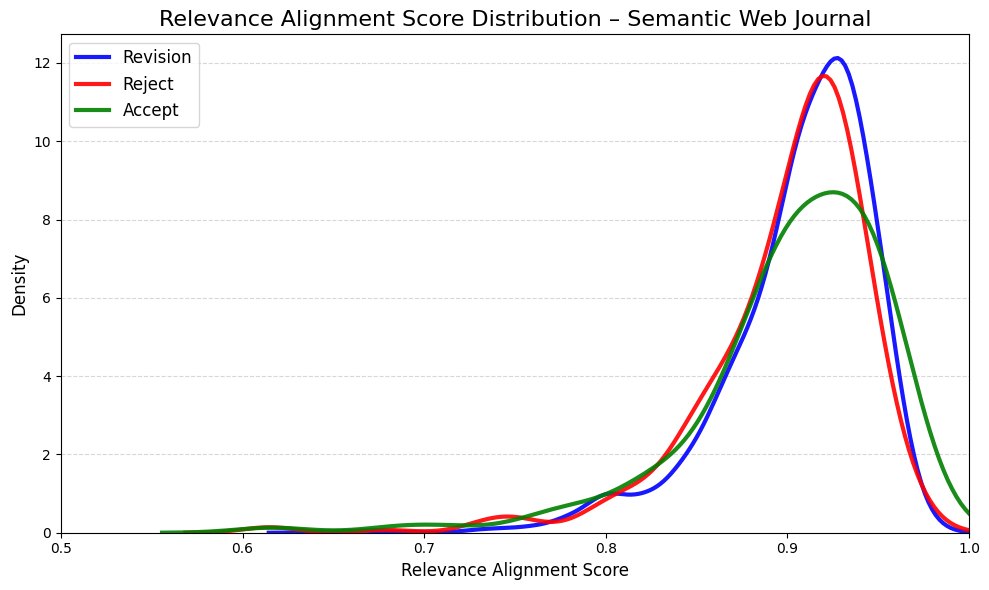

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mapping for review suggestions
review_mapping = {
    'Approved': 'Accept',
    'Not Approved': 'Reject',
    'Approved With Reservations': 'Revision',
    'Minor Revision': 'Revision',
    'Major Revision': 'Revision',
    'Accept': 'Accept',
    'Reject': 'Reject'
}

df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

# Apply the mapping and filter to the three categories for both dataframes
for df_name in ['df_f1000', 'df_sw']:
    df = globals()[df_name].copy()
    df['review_suggestion'] = df['review_suggestion'].replace(review_mapping)
    df = df[df['review_suggestion'].isin(['Accept', 'Reject', 'Revision'])].copy()
    globals()[df_name] = df

# Compute per-sample weights based on the new categories
for df in (df_f1000, df_sw):
    counts = df.groupby('review_suggestion')['review_suggestion'].transform('count')
    df['weight'] = 1.0 / counts  # Each group sums to 1

# Updated color map for the three categories
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

# Define the plotting function with the new color map
def plot_len_distribution(df, title):
    plt.figure(figsize=(10, 6))
    for suggestion in df['review_suggestion'].unique():
        subset = df[df['review_suggestion'] == suggestion]
        kwargs = {'color': color_map[suggestion]} if suggestion in color_map else {}
        sns.kdeplot(
            data=subset,
            x='Relevance_Alignment',
            label=suggestion,
            weights=subset['weight'],
            fill=False,
            alpha=0.9,
            linewidth=3,
            **kwargs
        )
    plt.title(f"Relevance Alignment Score Distribution – {title}", fontsize=16)
    plt.xlabel("Relevance Alignment Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xlim(0.5, 1)  # Set x-axis limit to 2000
    plt.tight_layout()
    plt.show()

# Generate the plots
plot_len_distribution(df_f1000, 'F1000')
plot_len_distribution(df_sw, 'Semantic Web Journal')

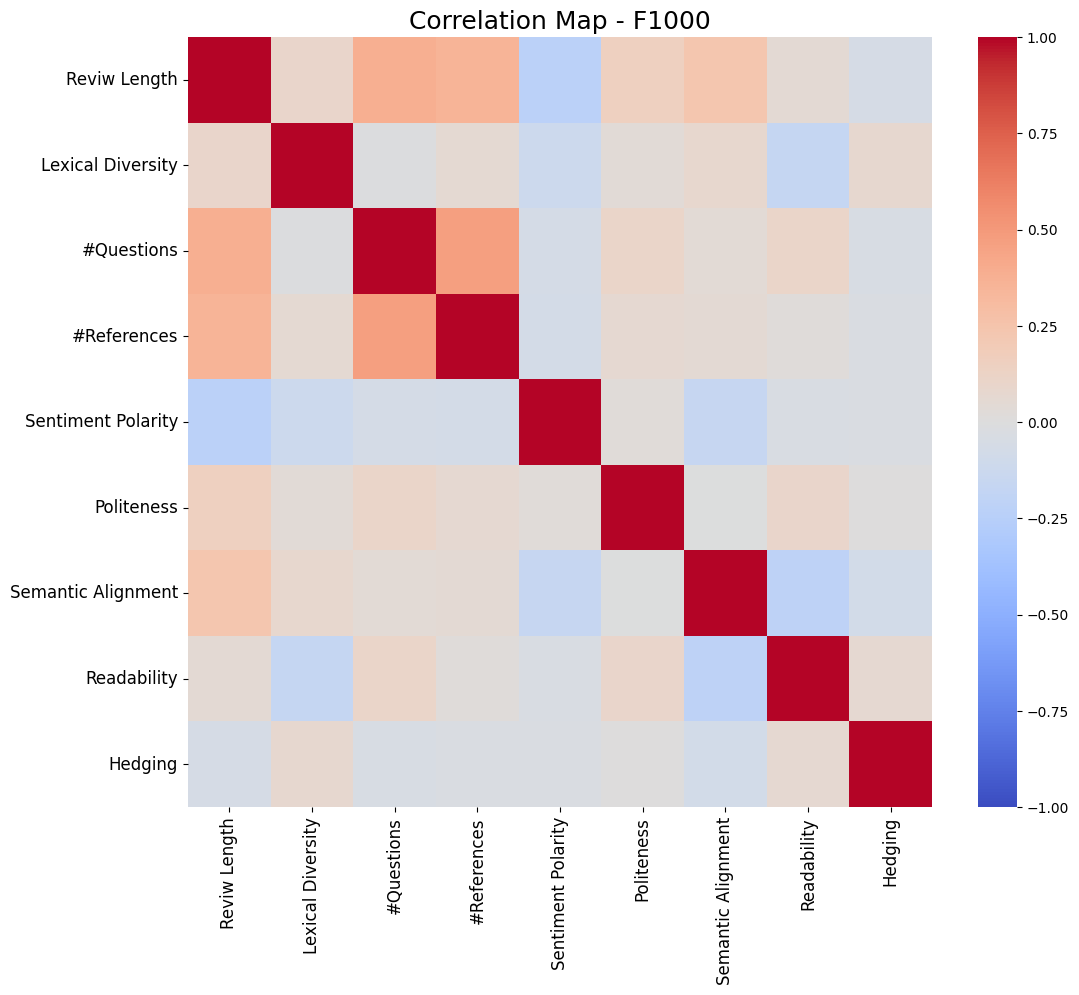

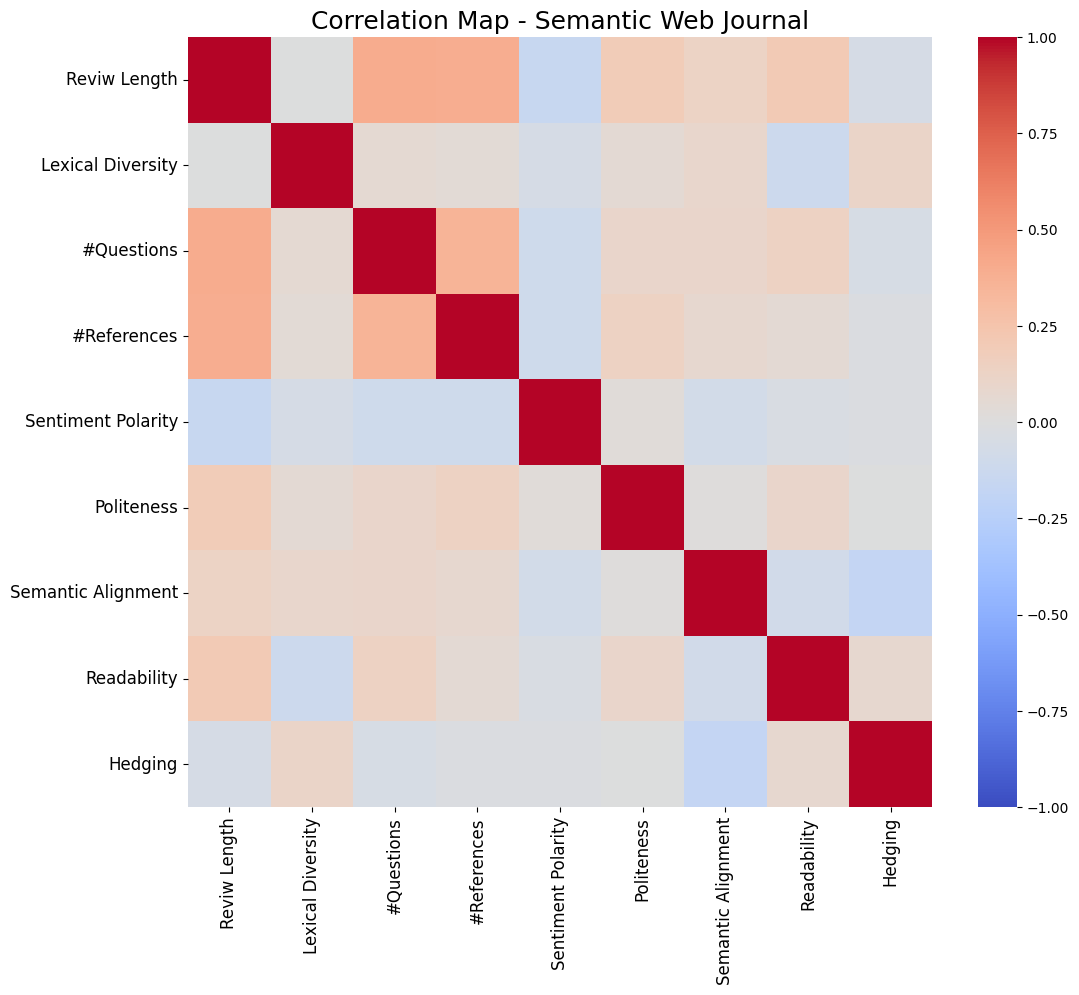

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

#drop columns starting with 'llm'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.startswith('llm')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.startswith('llm')]

#drop columns with names ends with '.1'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('.1')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('.1')]

#drop columns with names weight
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('weight')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('weight')]

###################
# create new column named hedge_score as follow: 1 - hedge_C / (hedge_E + hedge_D + hedge_C + hedge_N + hedge_I)
df_f1000['hedge_score'] = 1 - df_f1000['hedge_C'] / (df_f1000['hedge_E'] + df_f1000['hedge_D'] + df_f1000['hedge_C'] + df_f1000['hedge_N'] + df_f1000['hedge_I'])
df_sw['hedge_score'] = 1 - df_sw['hedge_C'] / (df_sw['hedge_E'] + df_sw['hedge_D'] + df_sw['hedge_C'] + df_sw['hedge_N'] + df_sw['hedge_I'])

# drop hedge_E, hedge_D, hedge_C, hedge_N, hedge_I
df_f1000 = df_f1000.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])
df_sw = df_sw.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])

# drop flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index
df_f1000 = df_f1000.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])
df_sw = df_sw.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])

# rename flesch_reading_ease to readability_score
df_f1000 = df_f1000.rename(columns={'flesch_reading_ease': 'readability_score'})
df_sw = df_sw.rename(columns={'flesch_reading_ease': 'readability_score'})

#drop columns end with date and submission_number
df_f1000 = df_f1000.drop(columns=[col for col in df_f1000.columns if col.endswith('submit') or col.endswith('submission_number')])
df_sw = df_sw.drop(columns=[col for col in df_sw.columns if col.endswith('submit') or col.endswith('submission_number')])


# df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
# df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

df_f1000 = df_f1000.rename(columns={'length_words': 'Reviw Length', 'mattr': 'Lexical Diversity', 'question_count': '#Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment'})
df_sw = df_sw.rename(columns={'length_words': 'Reviw Length', 'mattr': 'Lexical Diversity', 'question_count': '#Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment'})


# Function to plot correlation map
def plot_correlation_map(df, title):
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_columns.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, vmax=1, vmin=-1, center=0)
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot correlation maps for each dataframe
plot_correlation_map(df_f1000, 'Correlation Map - F1000')
plot_correlation_map(df_sw, 'Correlation Map - Semantic Web Journal')

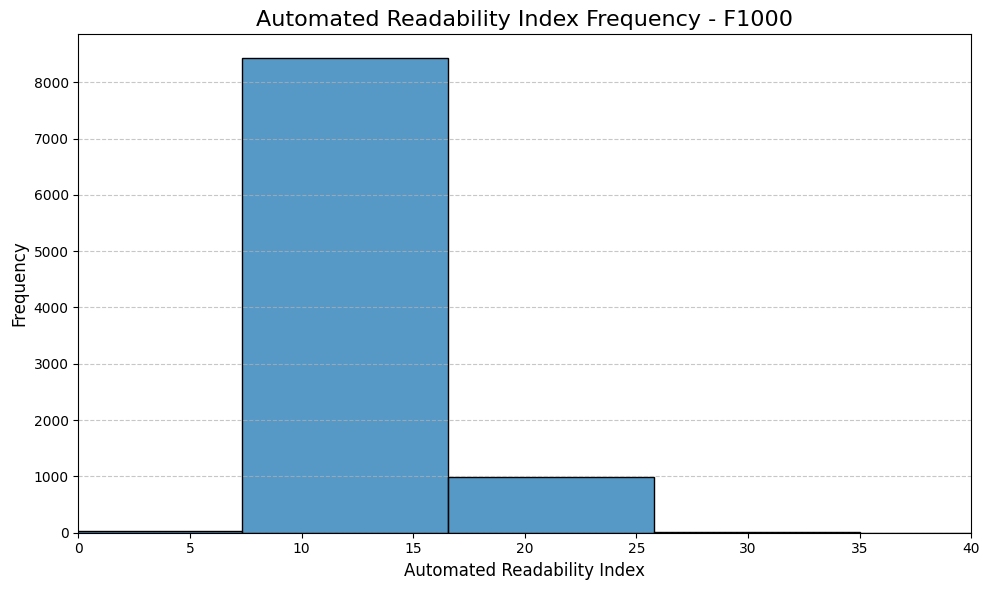

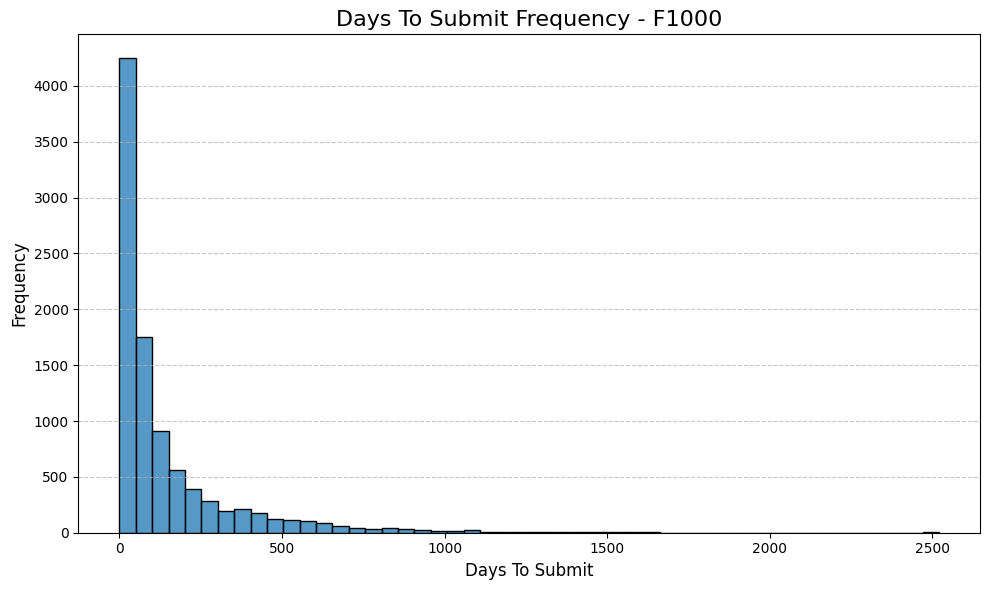

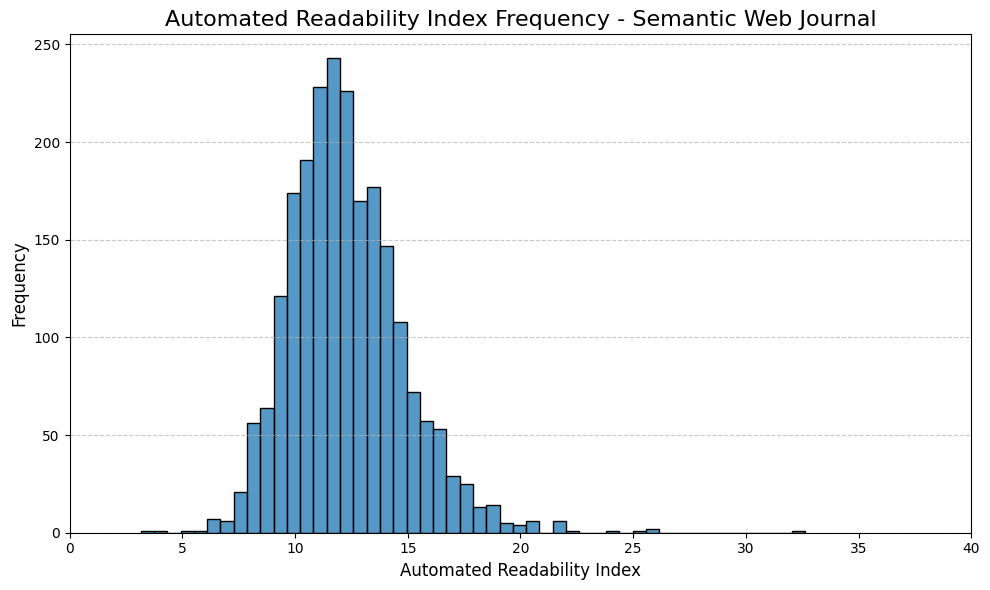

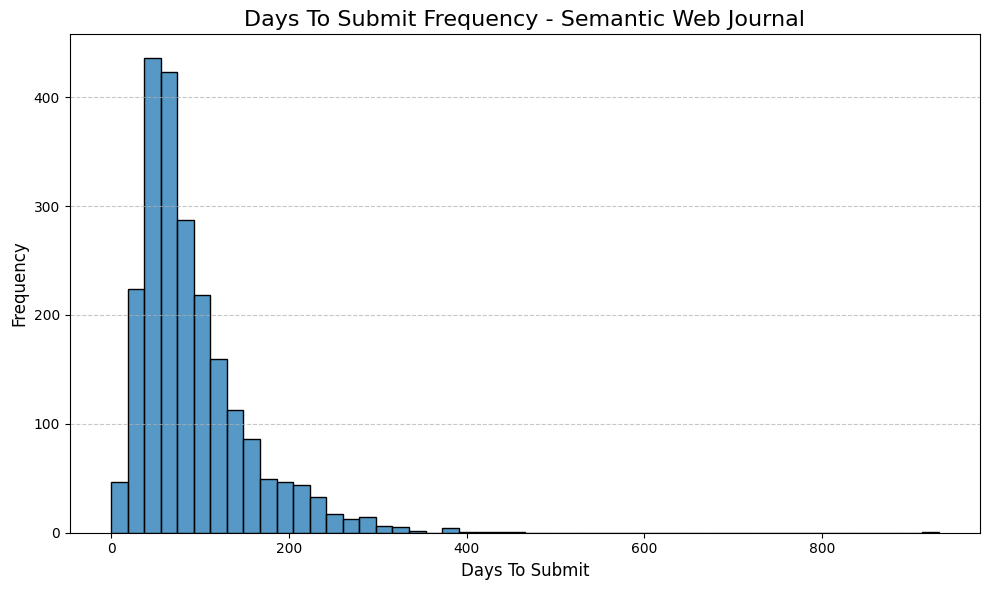

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_frequency(df, column, title, bins=50):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        kde=False
    )
    # if this is the readability plot, limit x from 0 to 40
    if column == 'automated_readability_index':
        plt.xlim(0, 40)

    plt.title(f"{column.replace('_', ' ').title()} Frequency - {title}",
              fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

for df, label in [(df_f1000, 'F1000'), (df_sw, 'Semantic Web Journal')]:
    for col in ['automated_readability_index', 'days_to_submit']:
        plot_frequency(df, col, label)

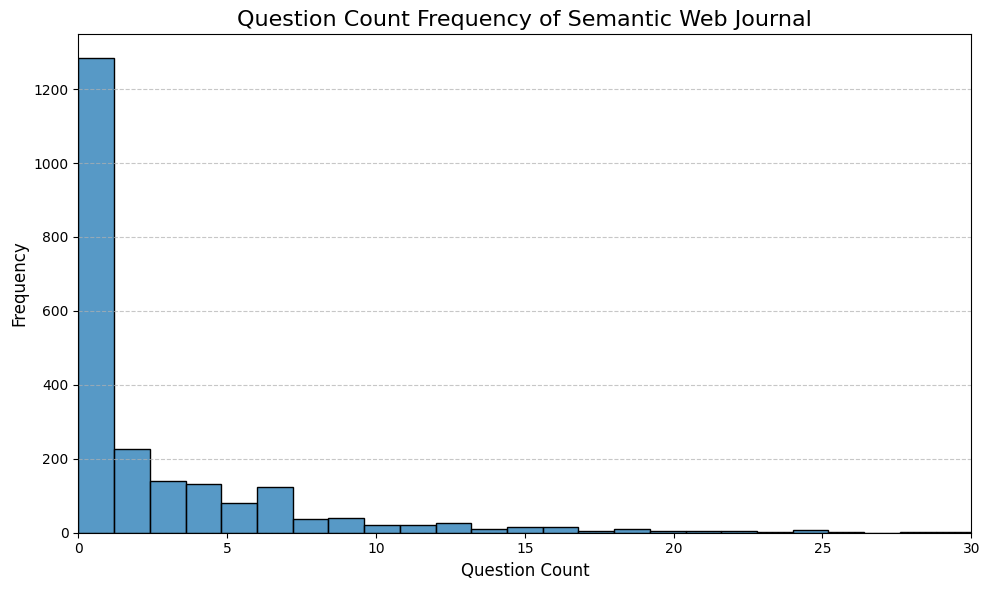

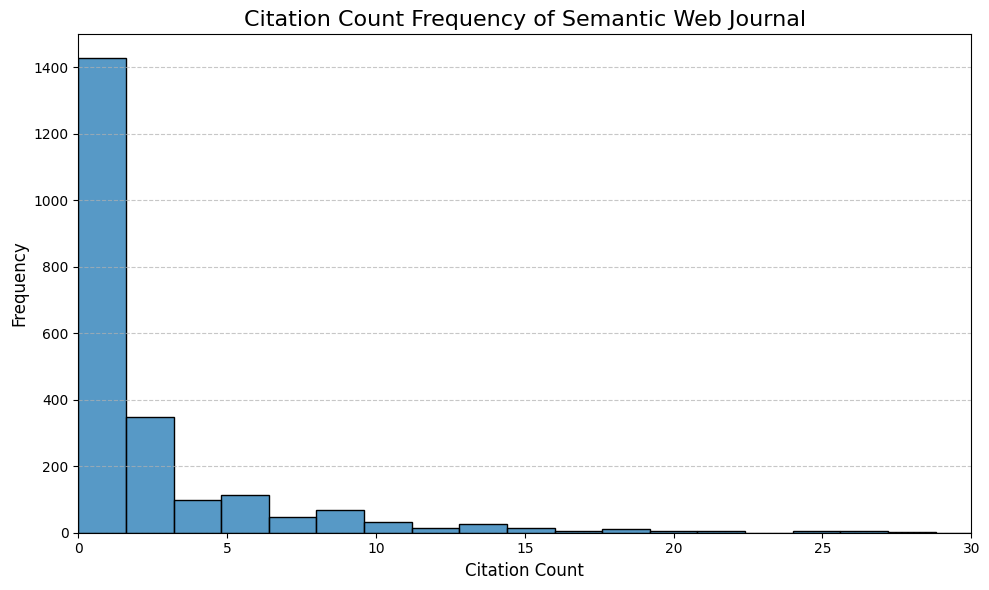

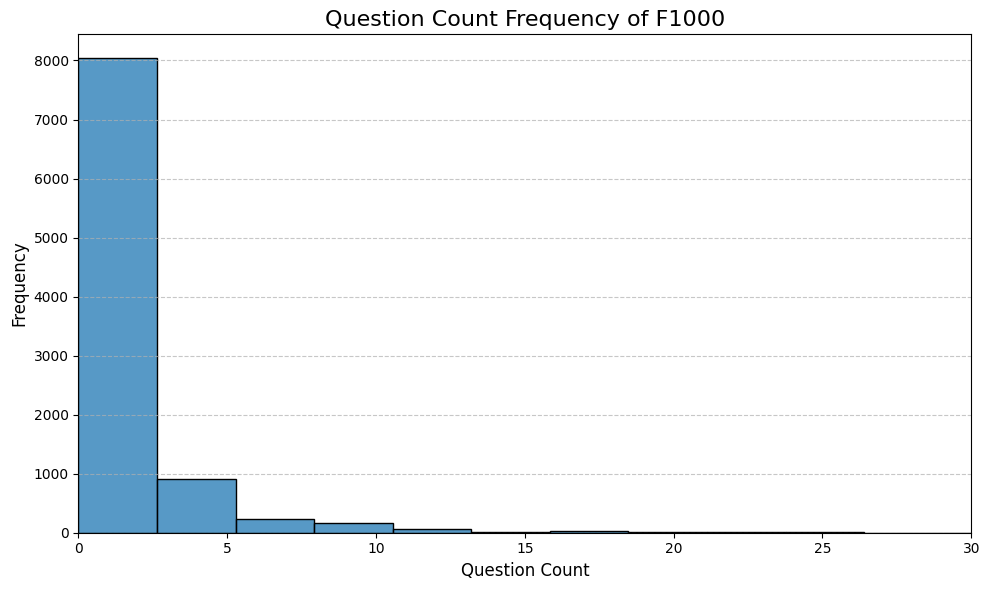

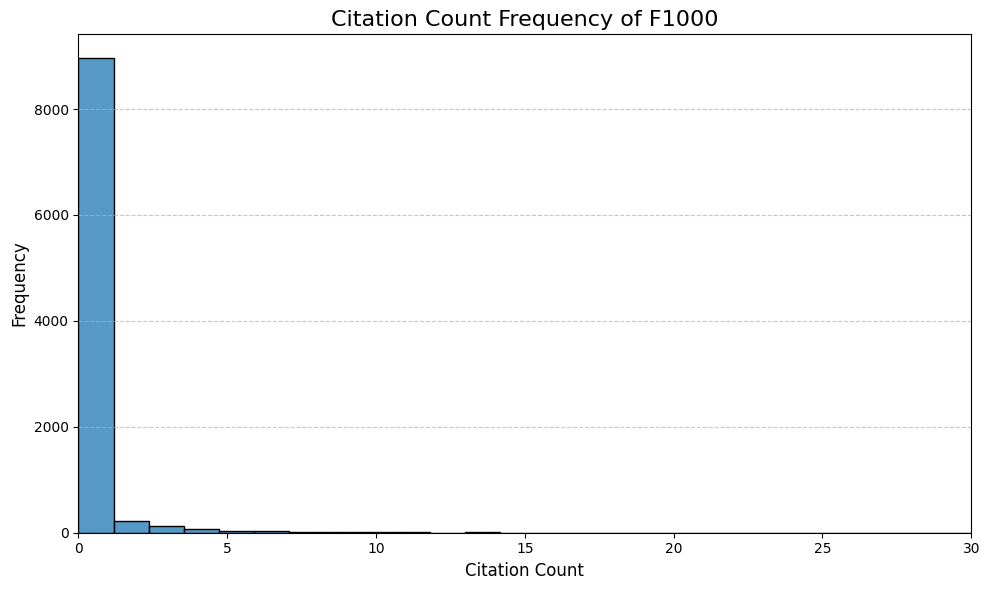

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_frequency(df, column, title, bins=50):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        kde=False
    )
    # if this is the readability plot, limit x from 0 to 40
    if column == 'question_count':
        plt.xlim(0, 30)
    elif column == 'citation_count':
        plt.xlim(0, 30)
    
    plt.title(f"{column.replace('_', ' ').title()} Frequency of {title}",
              fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


for df, label in [(df_sw, 'Semantic Web Journal'), (df_f1000, 'F1000')]:
    for col in ['question_count', 'citation_count']:
        plot_frequency(df, col, label)

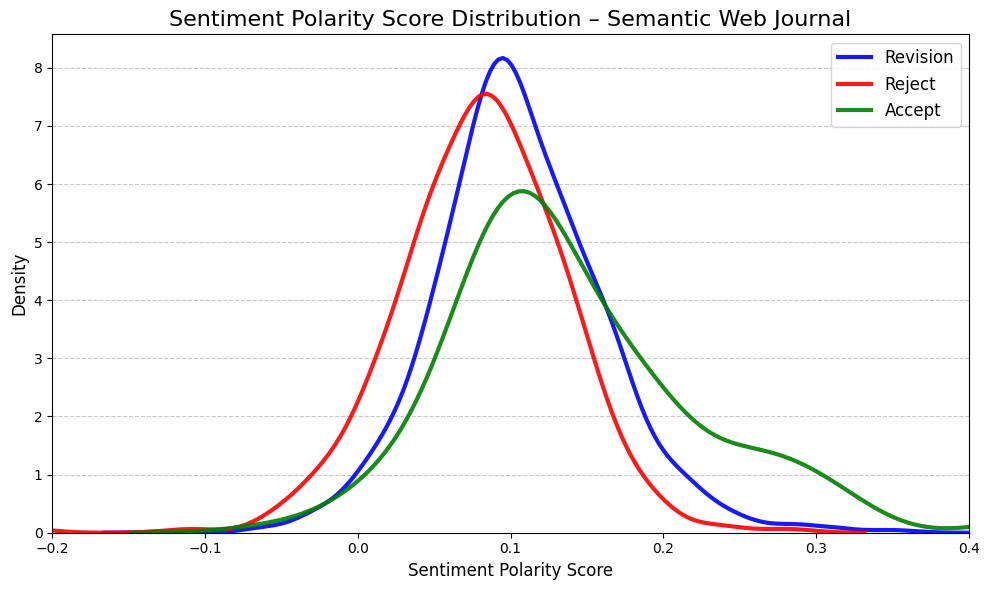

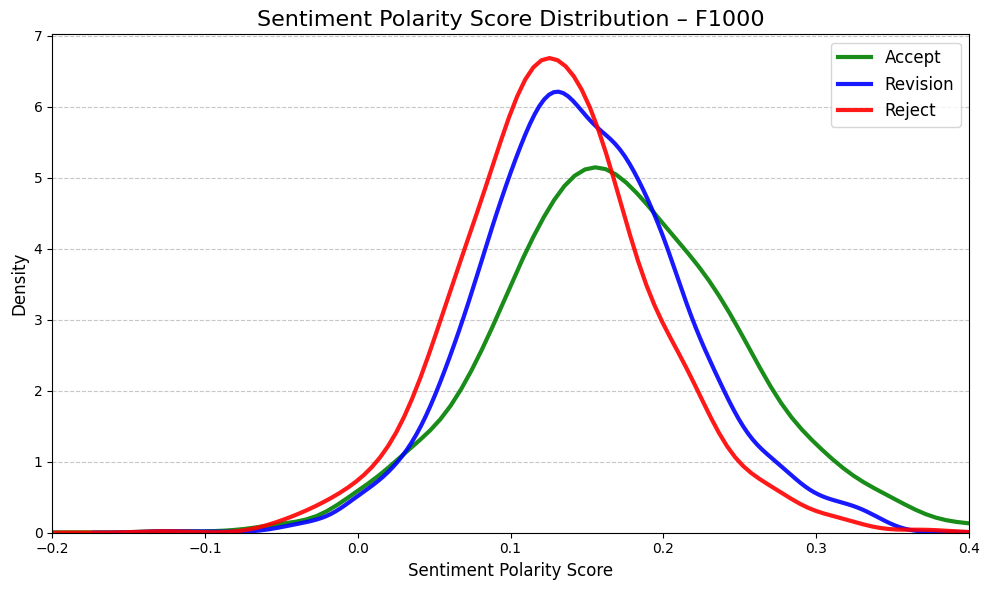

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# color map for suggestions/decisions
color_map = {
    'Accept': 'green',
    'Approved': 'green',
    'Reject': 'red',
    'Not Approved': 'red',
    'Minor Revision': 'blue',
    'Major Revision': 'orange',
    'Revision': 'blue'
}

def plot_polarity_distribution(df, title):
    df = df.copy()
    df['decision'] = df['review_suggestion']
    
    plt.figure(figsize=(10, 6))
    for decision in df['decision'].dropna().unique():
        subset = df[df['decision'] == decision]
        sns.kdeplot(
            data=subset,
            x='sentiment_polarity',
            label=decision,
            fill=False,
            alpha=0.9,
            linewidth=3,
            color=color_map.get(decision, None)
        )
    plt.title(f"Sentiment Polarity Score Distribution – {title}", fontsize=16)
    plt.xlabel("Sentiment Polarity Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-0.2, 0.4)
    plt.tight_layout()
    plt.show()

# Plot for Semantic Web Journal
plot_polarity_distribution(df_sw, 'Semantic Web Journal')

# Plot for F1000
plot_polarity_distribution(df_f1000, 'F1000')

In [25]:
df_sw

paper_id          reviewer  review_date review_suggestion  \
0     3654-4868         Anonymous  27/Aug/2024          Revision   
1     3654-4868  Janneth Chicaiza  03/Sep/2024          Revision   
2     3654-4868         Anonymous  10/Sep/2024          Revision   
3     3666-4880         Anonymous  16/Sep/2024          Revision   
4     3666-4880         Anonymous  30/Sep/2024          Revision   
...         ...               ...          ...               ...   
2332   400-1508         Anonymous  22/Mar/2013            Reject   
2333   400-1508      Pablo Mendes  02/Apr/2013          Revision   
2334   392-1487      Jiewen Huang  25/Dec/2012          Revision   
2335   392-1487      Marcin Wylot  05/Jan/2013            Reject   
2336   392-1487       Haofen Wang  31/Jan/2013            Reject   

      length_words                                              title  \
0              580  HiHo: A Hierarchical and Homogenous Subgraph L...   
1              363  HiHo: A Hierarchical and Homogenous Subgraph L...   
2              616  HiHo: A Hierarchical and Homogenous Subgraph L...   
3              683  A Complex Network Model for Knowledge Graphs' ...   
4              297  A Complex Network Model for Knowledge Graphs' ...   
...            ...                                                ...   
2332           583                       The LEGO Unified Concepticon   
2333           474                       The LEGO Unified Concepticon   
2334           473  A Scalable RDF Data Processing Framework based...   
2335           643  A Scalable RDF Data Processing Framework based...   
2336           594  A Scalable RDF Data Processing Framework based...   

                                               abstract  days_to_submit  \
0     Relation prediction in Knowledge Graphs (KGs) ...             180   
1     Relation prediction in Knowledge Graphs (KGs) ...             187   
2     Relation prediction in Knowledge Graphs (KGs) ...             194   
3     When dealing with Knowledge Graphs (KGs) struc...             189   
4     When dealing with Knowledge Graphs (KGs) struc...             203   
...                                                 ...             ...   
2332  The most widely available kind of linguistic d...             106   
2333  The most widely available kind of linguistic d...             117   
2334  In order to effectively handle the growing amo...              36   
2335  In order to effectively handle the growing amo...              47   
2336  In order to effectively handle the growing amo...              73   

                                            review_text   mattr  ...  \
0     The paper proposed a new approach/method for K...  0.7774  ...   
1     The subject on which the proposal is focused i...  0.7642  ...   
2     The paper introduces a novel approach to knowl...  0.7716  ...   
3     The paper presents a novel approach to underst...  0.7592  ...   
4     This paper describes a complex network generat...  0.7742  ...   
...                                                 ...     ...  ...   
2332  I had difficulties in reading the paper, but I...  0.7775  ...   
2333  The article presents an interesting resource a...  0.7972  ...   
2334  This paper proposes a salable RDF data managem...  0.7967  ...   
2335  In the paper the authors want to tackle with R...  0.7704  ...   
2336  In this paper, authors address an interesting ...  0.8007  ...   

      llm_vagueness_qwen3  llm_objectivity_qwen3  llm_fairness_qwen3  \
0                moderate                    4.0                 4.0   
1                     low                    5.0                 5.0   
2                    none                    5.0                 5.0   
3                moderate                    4.0                 4.0   
4                moderate                    4.0                 4.0   
...                   ...                    ...                 ...   
2332             moderate                  

In [26]:
import pandas as pd

df_sw_reviewer = pd.read_pickle('/home/ali/Review_Quality_Benchmark/Soroush/processed/sw_reviewers_similarity_info.pkl')

# 1. Turn your nested dict into a flat DataFrame
records = []
for paper_id, reviewers in df_sw_reviewer.items():
    for reviewer, metrics in reviewers.items():
        records.append({
            'paper_id':             paper_id,
            'reviewer':             reviewer,
            'max_similarity':       metrics.get('max_similarity'),
            'avg_similarity':       metrics.get('avg_similarity'),
            'avg_recent_similarity':metrics.get('avg_recent_similarity')
        })
df_sim = pd.DataFrame(records)

# 2. Merge onto your df_sw
df_sw = df_sw.merge(
    df_sim,
    on=['paper_id','reviewer'],
    how='left'
)

# 3. Force Anonymous rows to stay null
anon_mask = df_sw['reviewer'] == 'Anonymous'
df_sw.loc[anon_mask, ['max_similarity','avg_similarity','avg_recent_similarity']] = None


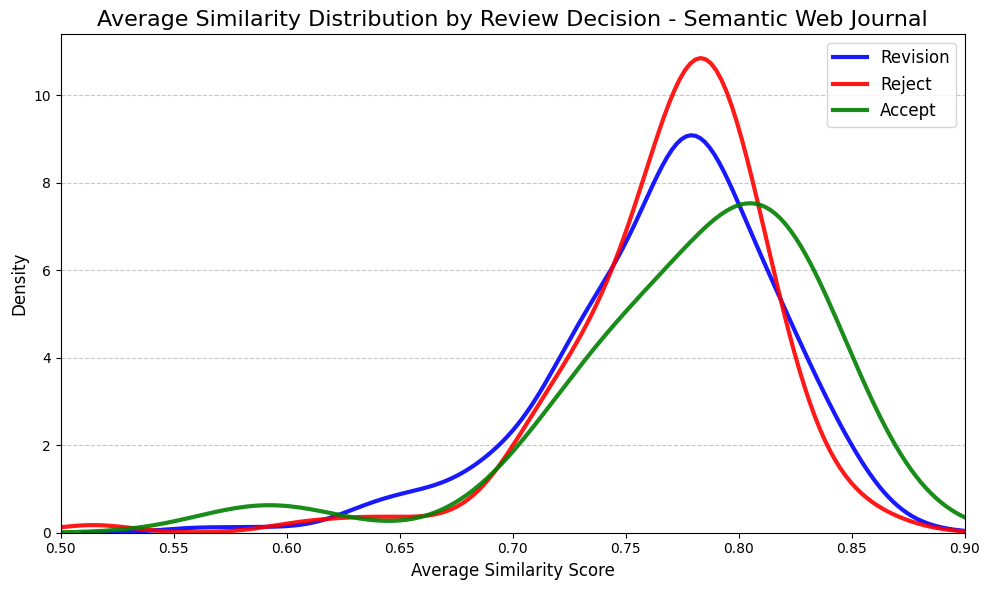

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preprocess review suggestions
review_mapping = {
    'Approved': 'Accept',
    'Not Approved': 'Reject',
    'Approved With Reservations': 'Revision',
    'Minor Revision': 'Revision',
    'Major Revision': 'Revision'
}

# Apply mapping and filter to target categories
df_sw['review_suggestion'] = df_sw['review_suggestion'].replace(review_mapping)
df_sw = df_sw[df_sw['review_suggestion'].isin(['Accept', 'Reject', 'Revision'])].copy()

# 2. Calculate weights for density normalization
counts = df_sw.groupby('review_suggestion')['review_suggestion'].transform('count')
df_sw['weight'] = 1.0 / counts

# 3. Set up visualization parameters
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

metric = 'avg_similarity'

# 4. Create single figure
plt.figure(figsize=(10, 6))

# 5. Plot distributions
for suggestion in df_sw['review_suggestion'].unique():
    subset = df_sw[
        (df_sw['review_suggestion'] == suggestion) &
        (df_sw[metric].notna())
    ]
    
    if subset.empty:
        continue
    
    sns.kdeplot(
        data=subset,
        x=metric,
        label=suggestion,
        color=color_map[suggestion],
        weights=subset['weight'],
        fill=False,
        alpha=0.9,
        linewidth=3
    )

# 6. Configure plot aesthetics
plt.title(f"Average Similarity Distribution by Review Decision - Semantic Web Journal", fontsize=16)
plt.xlabel("Average Similarity Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="", fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0.5, 0.9)
plt.tight_layout()
plt.show()

In [44]:
import pandas as pd

# --- load your nested reviewer info for F1000 ---
df_f1000_reviewer = pd.read_pickle('/home/ali/Review_Quality_Benchmark/Soroush/processed/f1000_reviewers_similarity_info.pkl')

df_f1000 = pd.read_csv('f1000research.csv')

# 1. flatten into a lookup DataFrame
records = []
for paper_id, reviewers in df_f1000_reviewer.items():
    for reviewer, metrics in reviewers.items():
        records.append({
            'paper_id':              paper_id + '/v1',
            'reviewer':              reviewer,
            'max_similarity':        metrics.get('max_similarity'),
            'avg_similarity':        metrics.get('avg_similarity'),
            'avg_recent_similarity': metrics.get('avg_recent_similarity')
        })
df_f1000_sim = pd.DataFrame(records)

# 2. merge onto your df_f1000
df_f1000 = df_f1000.merge(
    df_f1000_sim,
    on=['paper_id','reviewer'],
    how='left'
)

# 3. force Anonymous rows to stay null
anon_mask = df_f1000['reviewer'] == 'Anonymous'
df_f1000.loc[anon_mask, ['max_similarity','avg_similarity','avg_recent_similarity']] = None

In [45]:
df_f1000

paper_id            reviewer  \
0      https://f1000research.com/articles/11-565/v1     Daniel A Nation   
1      https://f1000research.com/articles/11-565/v1    Ahmet Turan Isik   
2      https://f1000research.com/articles/13-277/v2      Mansoor Rahman   
3     https://f1000research.com/articles/13-1238/v1   Dr. Talal Shihayb   
4     https://f1000research.com/articles/13-1238/v1          Nancy Ajwa   
...                                             ...                 ...   
9477      https://f1000research.com/articles/1-3/v1   Peter N. Robinson   
9478      https://f1000research.com/articles/1-3/v1  Christian Gilissen   
9479      https://f1000research.com/articles/1-1/v1  Suzanne Gaudreault   
9480      https://f1000research.com/articles/1-1/v1      Nigel Livesley   
9481      https://f1000research.com/articles/1-1/v1        Carlos Morel   

      review_date           review_suggestion  length_words  \
0     19 Jan 2023                    Approved           278   
1     27 Sep 2024  Approved With Reservations           181   
2     23 Dec 2024  Approved With Reservations           158   
3     04 Nov 2024  Approved With Reservations          1128   
4     26 Dec 2024                    Approved           295   
...           ...                         ...           ...   
9477  23 Jul 2012                    Approved           666   
9478  26 Jul 2012                    Approved           432   
9479  17 Jul 2012                    Approved           270   
9480  27 Jul 2012                Not Approved           633   
9481  02 Aug 2012                    Approved            33   

                                                  title  \
0     Assessing the role of vascular risk factors in...   
1     Assessing the role of vascular risk factors in...   
2     Impact of yoga on the central and peripheral v...   
3     Do more pregnancies increase the risk of perio...   
4     Do more pregnancies increase the risk of perio...   
...                                                 ...   
9477  Low budget analysis of Direct-To-Consumer geno...   
9478  Low budget analysis of Direct-To-Consumer geno...   
9479  Knowledge of specific HIV transmission modes i...   
9480  Knowledge of specific HIV transmission modes i...   
9481  Knowledge of specific HIV transmission modes i...   

                                               abstract  days_to_submit  \
0     Background:  Although observational studies de...             240   
1     Background:  Although observational studies de...             857   
2     Background The aim of this study was to observ...             227   
3     Background Hormonal changes in pregnancy and t...              19   
4     Background Hormonal changes in pregnancy and t...              71   
...                                                 ...             ...   
9477  Direct-to-consumer (DTC) genetic testing is a ...               7   
9478  Direct-to-consumer (DTC) genetic testing is a ...              10   
9479  Background: In prior research, Africans who kn...               4   
9480  Background: In prior research, Africans who kn...              14   
9481  Background: In prior research, Africans who kn...              20   

                                            review_text   mattr  ...  \
0     This is a meta-analysis of mendelian randomiza...  0.7832  ...   
1     I have reviewed the manuscript "Assessing the ...  0.7663  ...   
2     Is the work clearly and accurately presented a...  0.7591  ...   
3     The authors assessed the effects of number of ...  0.7783  ...   
4     The current structure provides a good foundati...  0.7944  ...   
...                                                 ...     ...  ...   
9477  23andMe and several other companies have been ...  0.7865  ...   
9478  This is a well written and interesting article...  0.7506  ...   
9479  This is an interesting article, and I think it...  0.7999  ...   
9480  This paper has a number of serious flaws.a) Th...

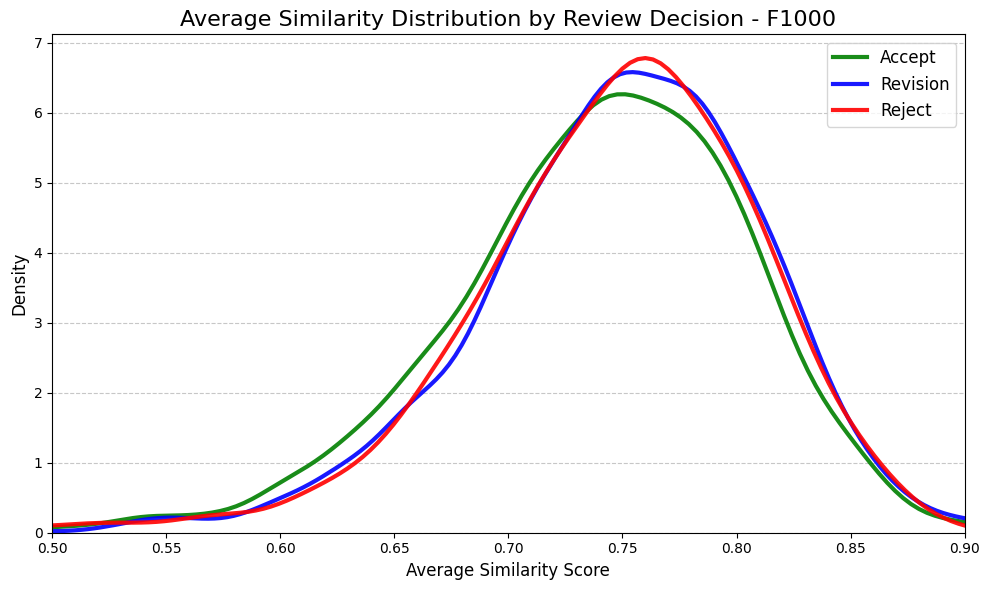

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preprocess review suggestions
review_mapping = {
    'Approved': 'Accept',
    'Not Approved': 'Reject',
    'Approved With Reservations': 'Revision',
    'Minor Revision': 'Revision',
    'Major Revision': 'Revision'
}

# Apply mapping and filter to target categories
df_f1000['review_suggestion'] = df_f1000['review_suggestion'].replace(review_mapping)
df_f1000 = df_f1000[df_f1000['review_suggestion'].isin(['Accept', 'Reject', 'Revision'])].copy()

# 2. Calculate weights for density normalization
counts = df_f1000.groupby('review_suggestion')['review_suggestion'].transform('count')
df_f1000['weight'] = 1.0 / counts

# 3. Set up visualization parameters
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

metric = 'avg_similarity'

# 4. Create single figure
plt.figure(figsize=(10, 6))

# 5. Plot distributions
for suggestion in df_f1000['review_suggestion'].unique():
    subset = df_f1000[
        (df_f1000['review_suggestion'] == suggestion) &
        (df_f1000[metric].notna())
    ]
    
    if subset.empty:
        continue
    
    sns.kdeplot(
        data=subset,
        x=metric,
        label=suggestion,
        color=color_map[suggestion],
        weights=subset['weight'],
        fill=False,
        alpha=0.9,
        linewidth=3
    )

# 6. Configure plot aesthetics
plt.title(f"Average Similarity Distribution by Review Decision - F1000", fontsize=16)
plt.xlabel("Average Similarity Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="", fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0.5, 0.9)
plt.tight_layout()
plt.show()

# Correlations

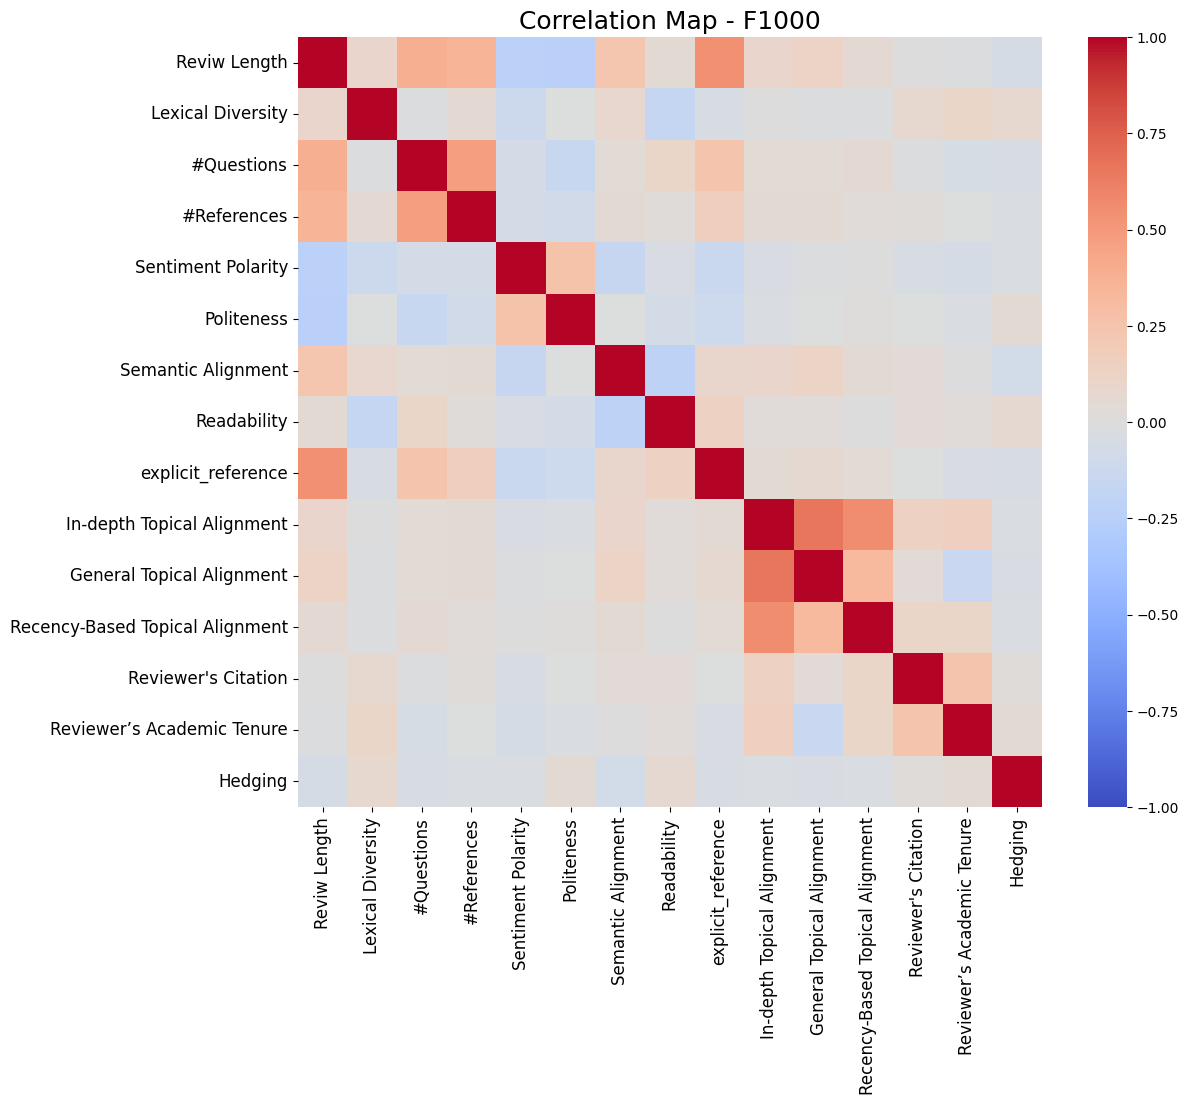

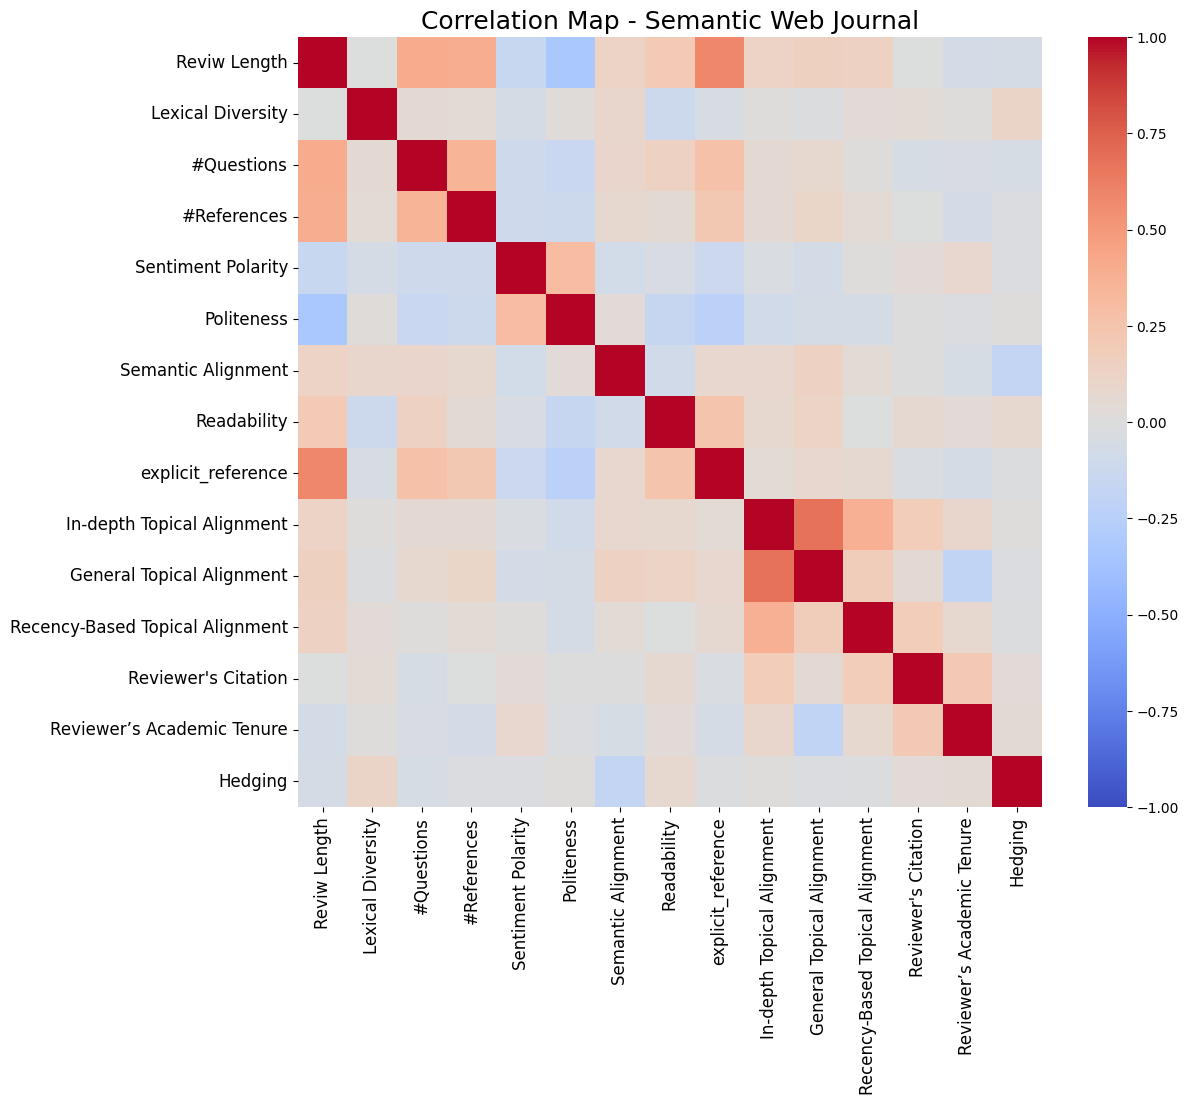

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



df_f1000 = pd.read_csv('f1000research.csv')
df_sw = pd.read_csv('semantic-web-journal-analysis.csv')


#drop columns starting with 'llm'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.startswith('llm')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.startswith('llm')]

#drop columns with names ends with '.1'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('.1')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('.1')]

#drop columns with names weight
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('weight')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('weight')]

###################
# create new column named hedge_score as follow: 1 - hedge_C / (hedge_E + hedge_D + hedge_C + hedge_N + hedge_I)
df_f1000['hedge_score'] = 1 - df_f1000['hedge_C'] / (df_f1000['hedge_E'] + df_f1000['hedge_D'] + df_f1000['hedge_C'] + df_f1000['hedge_N'] + df_f1000['hedge_I'])
df_sw['hedge_score'] = 1 - df_sw['hedge_C'] / (df_sw['hedge_E'] + df_sw['hedge_D'] + df_sw['hedge_C'] + df_sw['hedge_N'] + df_sw['hedge_I'])

# drop hedge_E, hedge_D, hedge_C, hedge_N, hedge_I
df_f1000 = df_f1000.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])
df_sw = df_sw.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])

# drop flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index
df_f1000 = df_f1000.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])
df_sw = df_sw.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])

# rename flesch_reading_ease to readability_score
df_f1000 = df_f1000.rename(columns={'flesch_reading_ease': 'readability_score'})
df_sw = df_sw.rename(columns={'flesch_reading_ease': 'readability_score'})

#drop columns end with date and submission_number
df_f1000 = df_f1000.drop(columns=[col for col in df_f1000.columns if col.endswith('submit') or col.endswith('submission_number')])
df_sw = df_sw.drop(columns=[col for col in df_sw.columns if col.endswith('submit') or col.endswith('submission_number')])


# df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
# df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

df_f1000 = df_f1000.rename(columns={'length_words': 'Reviw Length', 'mattr': 'Lexical Diversity', 'question_count': '#Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment',
'max_similarity': 'In-depth Topical Alignment', 'avg_similarity': 'General Topical Alignment', 'avg_recent_similarity': 'Recency-Based Topical Alignment', 'reviewer_citations': 'Reviewer\'s Citation', 'reviewer_experience_years': 'Reviewer’s Academic Tenure'})
df_sw = df_sw.rename(columns={'length_words': 'Reviw Length', 'mattr': 'Lexical Diversity', 'question_count': '#Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment',
'max_similarity': 'In-depth Topical Alignment', 'avg_similarity': 'General Topical Alignment', 'avg_recent_similarity': 'Recency-Based Topical Alignment', 'reviewer_citations': 'Reviewer\'s Citation', 'reviewer_experience_years': 'Reviewer’s Academic Tenure'})


'''
max_similarity --> In-depth Topical Alignment
avg_similarity --> General Topical Alignment
avg_recent_similarity --> Recency-Based Topical Alignment
reviewer_citations --> Reviewer's Citation
reviewer_experience_years --> Reviewer’s Academic Tenure
'''

# Function to plot correlation map
def plot_correlation_map(df, title):
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_columns.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, vmax=1, vmin=-1, center=0)
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot correlation maps for each dataframe
plot_correlation_map(df_f1000, 'Correlation Map - F1000')
plot_correlation_map(df_sw, 'Correlation Map - Semantic Web Journal')

/tmp/ipykernel_1352378/3375838116.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


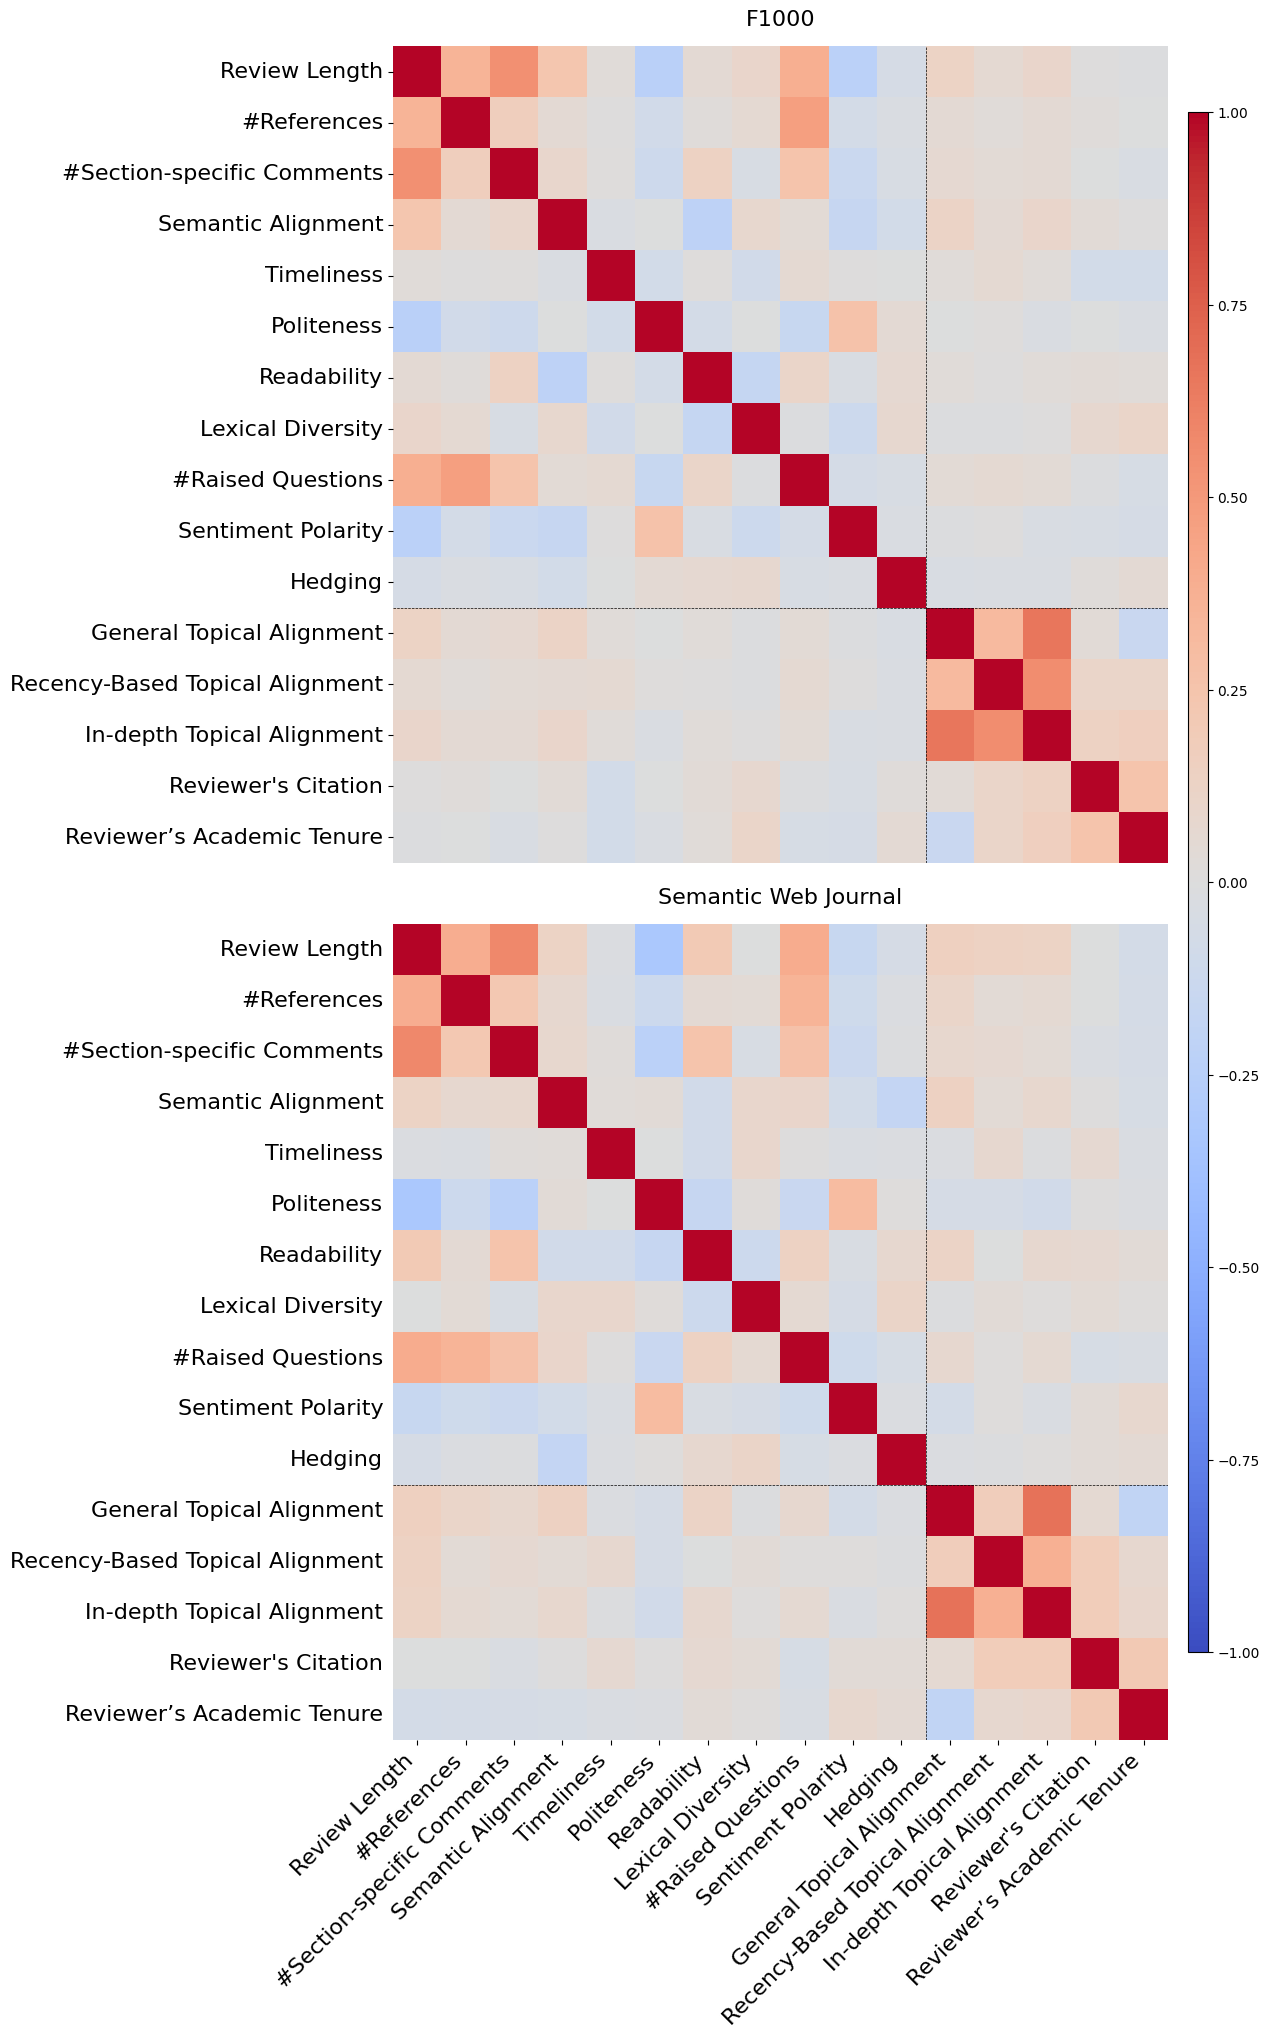

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



df_f1000 = pd.read_csv('f1000research.csv')
df_sw = pd.read_csv('semantic-web-journal-analysis.csv')


#drop columns starting with 'llm'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.startswith('llm')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.startswith('llm')]

#drop columns with names ends with '.1'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('.1')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('.1')]

#drop columns with names weight
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('weight')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('weight')]

###################
# create new column named hedge_score as follow: 1 - hedge_C / (hedge_E + hedge_D + hedge_C + hedge_N + hedge_I)
df_f1000['hedge_score'] = 1 - df_f1000['hedge_C'] / (df_f1000['hedge_E'] + df_f1000['hedge_D'] + df_f1000['hedge_C'] + df_f1000['hedge_N'] + df_f1000['hedge_I'])
df_sw['hedge_score'] = 1 - df_sw['hedge_C'] / (df_sw['hedge_E'] + df_sw['hedge_D'] + df_sw['hedge_C'] + df_sw['hedge_N'] + df_sw['hedge_I'])

# drop hedge_E, hedge_D, hedge_C, hedge_N, hedge_I
df_f1000 = df_f1000.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])
df_sw = df_sw.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])

# drop flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index
df_f1000 = df_f1000.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])
df_sw = df_sw.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])

# rename flesch_reading_ease to readability_score
df_f1000 = df_f1000.rename(columns={'flesch_reading_ease': 'readability_score'})
df_sw = df_sw.rename(columns={'flesch_reading_ease': 'readability_score'})

#drop columns end with date and submission_number
# df_f1000 = df_f1000.drop(columns=[col for col in df_f1000.columns if col.endswith('submit') or col.endswith('submission_number')])
# df_sw = df_sw.drop(columns=[col for col in df_sw.columns if col.endswith('submit') or col.endswith('submission_number')])


# df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
# df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

df_f1000 = df_f1000.rename(columns={'length_words': 'Review Length', 'mattr': 'Lexical Diversity', 'question_count': '#Raised Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment',
'max_similarity': 'In-depth Topical Alignment', 'avg_similarity': 'General Topical Alignment', 'avg_recent_similarity': 'Recency-Based Topical Alignment', 'reviewer_citations': 'Reviewer\'s Citation', 'reviewer_experience_years': 'Reviewer’s Academic Tenure', 'explicit_reference': '#Section-specific Comments', 'days_to_submit': 'Timeliness'})
df_sw = df_sw.rename(columns={'length_words': 'Review Length', 'mattr': 'Lexical Diversity', 'question_count': '#Raised Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment',
'max_similarity': 'In-depth Topical Alignment', 'avg_similarity': 'General Topical Alignment', 'avg_recent_similarity': 'Recency-Based Topical Alignment', 'reviewer_citations': 'Reviewer\'s Citation', 'reviewer_experience_years': 'Reviewer’s Academic Tenure', 'explicit_reference': '#Section-specific Comments', 'days_to_submit': 'Timeliness'})


def plot_combined_correlation_maps(df1, df2, title1, title2):
    # Columns to move to bottom
    bottom_group = [
        'General Topical Alignment',
        'Recency-Based Topical Alignment',
        'In-depth Topical Alignment',
        "Reviewer's Citation",
        "Reviewer’s Academic Tenure"
    ]
    
    top_group = [
        'Review Length', '#References', '#Section-specific Comments', 'Semantic Alignment', 'Timeliness', 'Politeness', 
        'Readability', 'Lexical Diversity', '#Raised Questions', 'Sentiment Polarity', 'Hedging']
    
    # Create figure with 2 rows, 1 column (stacked vertically)
    fig, (ax1, ax2) = plt.subplots(
        2, 1,
        figsize=(10, 22),                   # flip to a tall figure
        gridspec_kw={
            'height_ratios': [1, 1],       # equal row heights
            'hspace': 0.075                  # small vertical gap
        }
    )


    def process_df(df):
        # Reorder columns with bottom group last
        # all_cols = [c for c in df.columns if c not in bottom_group]
        # return df[all_cols + bottom_group]
        return df[top_group + bottom_group]

    # Process both dataframes
    df1_processed = process_df(df1.select_dtypes(include=['float64', 'int64']))
    df2_processed = process_df(df2.select_dtypes(include=['float64', 'int64']))
    
    # Calculate correlations with new order
    corr1 = df1_processed.corr()
    corr2 = df2_processed.corr()
    
    # Find global min/max
    vmin = -1  #min(corr1.min().min(), corr2.min().min())
    vmax = 1  #max(corr1.max().max(), corr2.max().max())
    
    # Plot first heatmap
    sns.heatmap(corr1, ax=ax1, cmap='coolwarm', cbar=False,
                vmin=vmin, vmax=vmax, center=0, xticklabels=False, yticklabels=True)
    ax1.set_title(title1, fontsize=16, pad=15)
    
    # Plot second heatmap
    sns.heatmap(corr2, ax=ax2, cmap='coolwarm', cbar=False,
                vmin=vmin, vmax=vmax, center=0, xticklabels=True, yticklabels=True)
    ax2.set_title(title2, fontsize=16, pad=15)
    
    # Add bold separation lines
    sep_position = len(corr1.columns) - len(bottom_group)
    for ax in [ax1, ax2]:
        ax.axhline(sep_position, color='black', linewidth=0.5, linestyle='--')
        ax.axvline(sep_position, color='black', linewidth=0.5, linestyle='--')
    
    # Shared colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(ax1.collections[0], cax=cbar_ax, shrink=0.5)
    
    # Adjust ticks and labels
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    plt.setp(ax1.get_yticklabels(), fontsize=16)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    plt.setp(ax2.get_yticklabels(), fontsize=16)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    # Final adjustments
    ax2.tick_params(left=False)
    plt.tight_layout()
    
    plt.savefig('reviewer_dep_corr.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Usage
plot_combined_correlation_maps(df_f1000, df_sw,
                              'F1000',
                              'Semantic Web Journal')

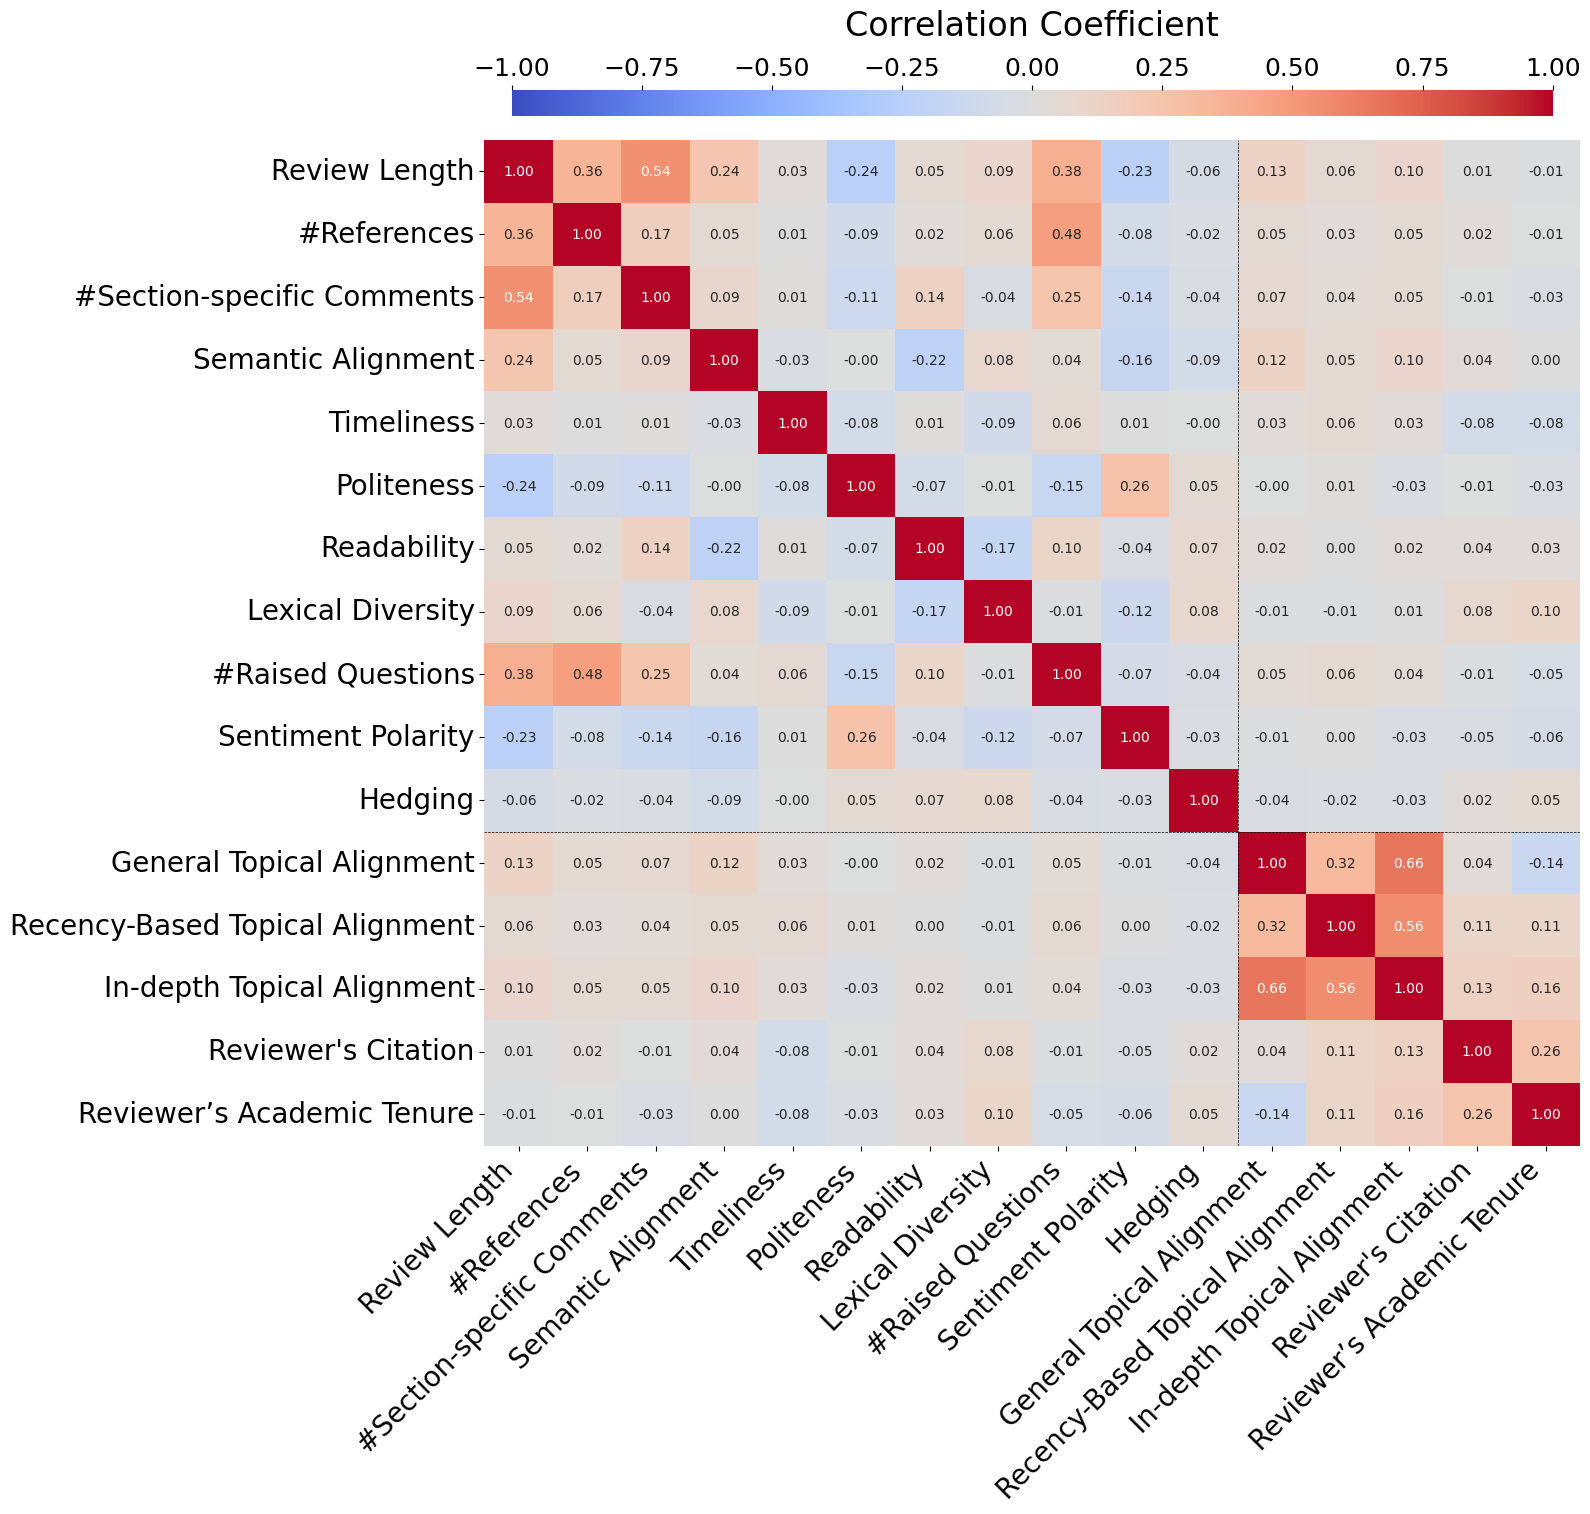

In [ ]:
def plot_single_correlation_map(df, title):
    # same bottom/top grouping logic…
    bottom_group = [
        'General Topical Alignment',
        'Recency-Based Topical Alignment',
        'In-depth Topical Alignment',
        "Reviewer's Citation",
        "Reviewer’s Academic Tenure"
    ]
    top_group = [
        'Review Length', '#References', '#Section-specific Comments', 'Semantic Alignment',
        'Timeliness', 'Politeness', 'Readability', 'Lexical Diversity',
        '#Raised Questions', 'Sentiment Polarity', 'Hedging'
    ]

    def process_df(df):
        return df[top_group + bottom_group]

    # process only the first df
    df_processed = process_df(df.select_dtypes(include=['float64', 'int64']))
    corr = df_processed.corr()

    # make a single tall figure
    fig, ax = plt.subplots(
        1, 1,
        figsize=(16, 16),
        gridspec_kw={'hspace': 0.0}  # no extra vertical gap needed
    )

    # draw the heatmap
    sns.heatmap(
        corr,
        ax=ax,
        cmap='coolwarm',
        vmin=-1, vmax=1,
        center=0,
        annot=True,
        fmt=".2f",
        cbar=True,
        cbar_kws={
            'label': 'Correlation Coefficient',
            'orientation': 'horizontal',  # Key parameter
            'location': 'top',            # Position
            'pad': 0.02,                  # Distance from heatmap
            'shrink': 0.95,                # Size relative to heatmap
            'aspect': 40                   # Length vs thickness ratio
        },
        xticklabels=True,
        yticklabels=True,
        annot_kws={"size": 10}
    )

    ax.set_title(title, fontsize=20, pad=15)

    # add the separation line
    sep = len(corr.columns) - len(bottom_group)
    ax.axhline(sep, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(sep, color='black', linewidth=0.5, linestyle='--')

    # Access colorbar and modify labels
    cbar = ax.collections[0].colorbar
    cbar.ax.xaxis.label.set_size(24)      # Changed from yaxis to xaxis
    cbar.ax.tick_params(axis='x', labelsize=18)  # Changed axis to 'x'
    cbar.ax.xaxis.labelpad = 15


    # Adjust layout to make space for top colorbar
    # plt.subplots_adjust(top=0.85)  # Increase top margin

    # tweak tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=20)
    plt.setp(ax.get_yticklabels(), rotation=0, fontsize=20)

    plt.tight_layout()
    plt.savefig(f'corr_{title}_qmetric.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Usage for only the F1000 map:
plot_single_correlation_map(df_f1000, '')


In [ ]:
df_human_qmetric = pd.read_csv('/home/ali/Review_Quality_Benchmark/Qmetrics-vs-Human/human_llms_qmetrics.csv')
df_human_qmetric

# drop all the columns that start with 'Qwen', 'Llama', 'GPT', 'Phi'
df_human_qmetric = df_human_qmetric.loc[:, ~df_human_qmetric.columns.str.startswith(('Qwen', 'Llama', 'GPT', 'Phi'))]
# drop paper_id, reviewer, title, abstract, review_text
df_human_qmetric = df_human_qmetric.drop(columns=['paper_id', 'reviewer', 'title', 'abstract', 'review_text', 'venue'])
# rename the columns 
df_human_qmetric = df_human_qmetric.rename(columns={'length_words': 'Review Length', 'mattr': 'Lexical Diversity', 'question_count': '#Raised Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'flesch_reading_ease': 'Readability', 'similarity_score': 'Semantic Alignment',
'days_to_submit': 'Timeliness', 'hedging': 'Hedging'})
df_human_qmetric

CATEGORY_MAP = {
    'Human_Factuality': ['unfactual', 'partially factual', 'factual'],
    'Human_Politeness': ['impolite', 'neutral', 'polite'],
    'Human_Sentiment_Polarity': ['negative', 'neutral', 'positive'],
    'Human_Vagueness': ['none', 'low', 'moderate', 'high', 'extreme']
}

# change the values of columns in CATEGORY_MAP to numerical values
def map_categories(df, category_map):
    for category, values in category_map.items():
        df[category] = df[category].apply(lambda x: values.index(x) if x in values else None)
    return df

# Apply the mapping to the DataFrame
df_human_qmetric = map_categories(df_human_qmetric, CATEGORY_MAP)
# Convert columns to float
df_human_qmetric = df_human_qmetric.astype({
    'Human_Factuality': 'float',
    'Human_Politeness': 'float',
    'Human_Sentiment_Polarity': 'float',
    'Human_Vagueness': 'float'
})
df_human_qmetric.columns

Index(['Review Length', '#References', '#Raised Questions',
       'Lexical Diversity', 'Sentiment Polarity', 'Semantic Alignment',
       'Timeliness', 'Readability', 'Politeness', 'Hedging',
       'Human_Actionability', 'Human_Clarity_and_Readability',
       'Human_Comprehensiveness', 'Human_Constructiveness', 'Human_Factuality',
       'Human_Fairness', 'Human_Objectivity', 'Human_Overall_Quality',
       'Human_Politeness', 'Human_Relevance_Alignment',
       'Human_Sentiment_Polarity', 'Human_Usage_of_Technical_Terms',
       'Human_Vagueness'],
      dtype='object')

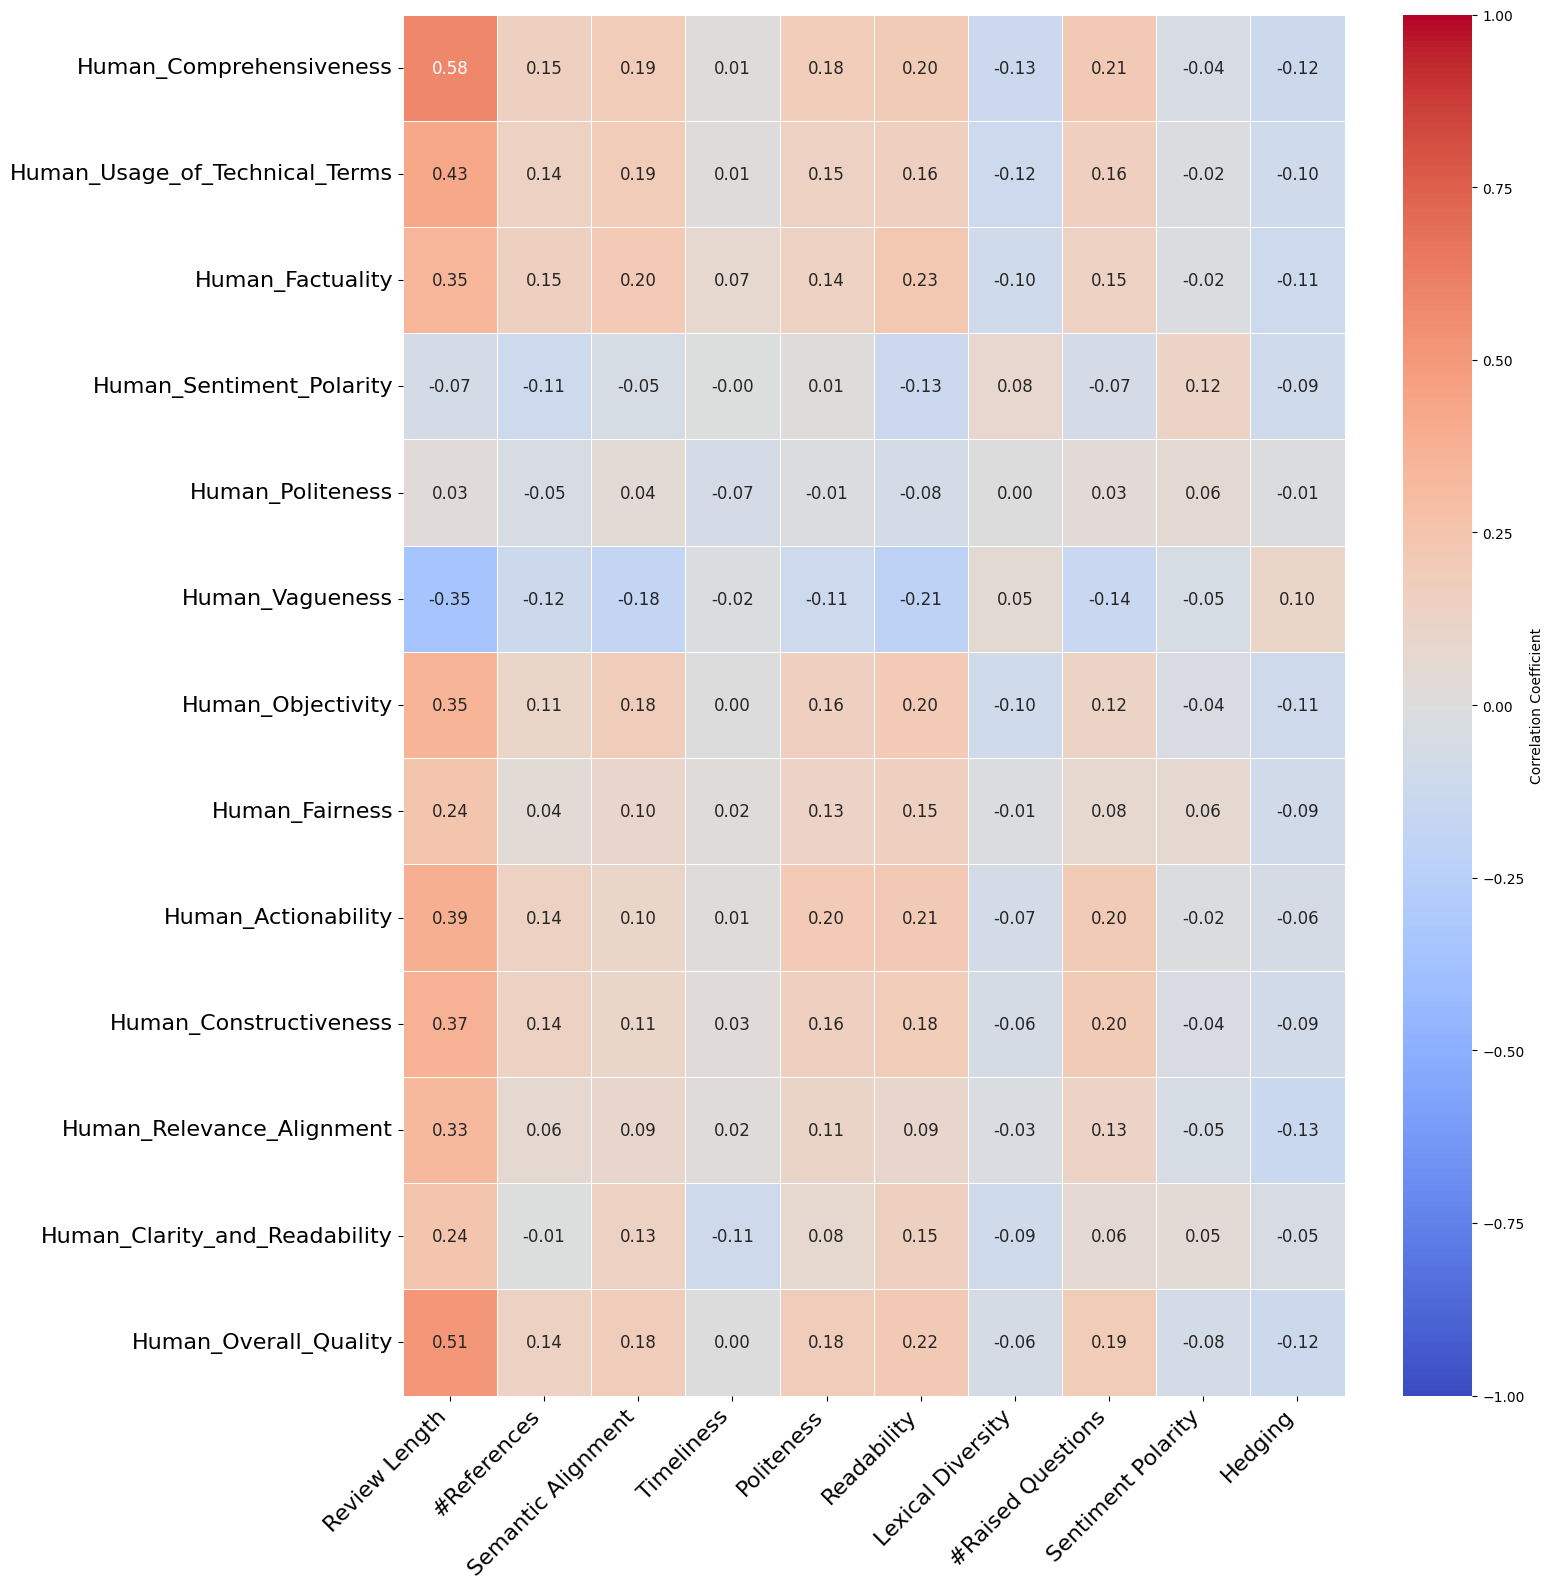

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_human_qmetric.copy()

# Separate columns into two groups
non_human_columns = [
        'Review Length', '#References', 'Semantic Alignment', 'Timeliness', 'Politeness', 
        'Readability', 'Lexical Diversity', '#Raised Questions', 'Sentiment Polarity', 'Hedging']

human_columns = ['Human_Comprehensiveness', 'Human_Usage_of_Technical_Terms', 'Human_Factuality', 'Human_Sentiment_Polarity',
                 'Human_Politeness', 'Human_Vagueness', 'Human_Objectivity', 'Human_Fairness', 'Human_Actionability', 'Human_Constructiveness',
                 'Human_Relevance_Alignment', 'Human_Clarity_and_Readability', 'Human_Overall_Quality']

# Create a subset DataFrame for correlation analysis
correlation_df = df[human_columns + non_human_columns]

# Calculate correlations
corr_matrix = correlation_df.corr()

# Slice the correlation matrix to show only Human vs Non-Human correlations
human_vs_rest = corr_matrix.loc[human_columns, non_human_columns]

# Plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(human_vs_rest, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            vmin=-1, 
            vmax=1, 
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={"size": 12})

# Formatting
plt.title('', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
# plt.xlabel('Quantifiable Metrics', fontsize=16)
# plt.ylabel('Human Evaluations', fontsize=16)

# # Access colorbar and modify labels
# cbar = ax.collections[0].colorbar
# cbar.ax.xaxis.label.set_size(18)      # Changed from yaxis to xaxis
# cbar.ax.tick_params(axis='x', labelsize=14)  # Changed axis to 'x'

# Adjust layout
plt.tight_layout()
plt.show()

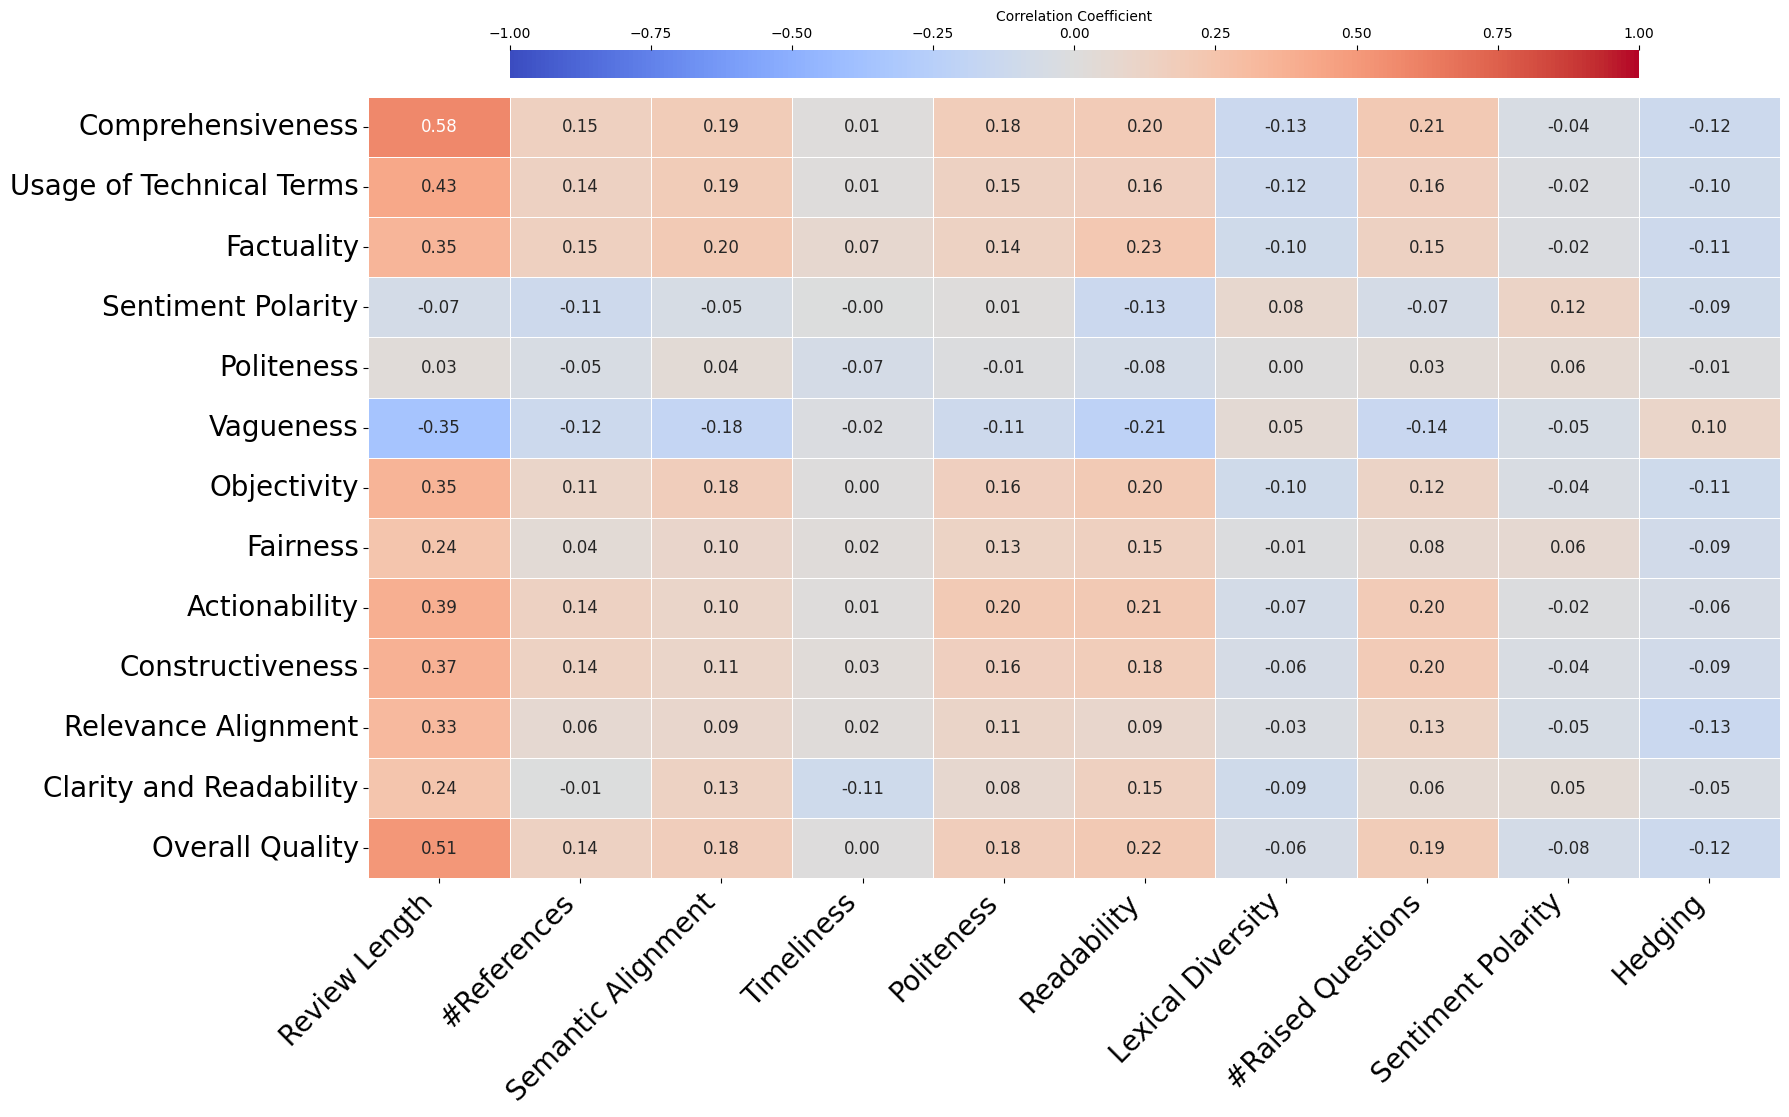

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_human_qmetric.copy()

# Original column names (keep unchanged)
non_human_columns = [
    'Review Length', '#References', 'Semantic Alignment', 'Timeliness', 'Politeness',
    'Readability', 'Lexical Diversity', '#Raised Questions', 'Sentiment Polarity', 'Hedging'
]

human_columns = [
    'Human_Comprehensiveness', 'Human_Usage_of_Technical_Terms', 'Human_Factuality',
    'Human_Sentiment_Polarity', 'Human_Politeness', 'Human_Vagueness', 'Human_Objectivity',
    'Human_Fairness', 'Human_Actionability', 'Human_Constructiveness',
    'Human_Relevance_Alignment', 'Human_Clarity_and_Readability', 'Human_Overall_Quality'
]

# Create display labels without "Human_" and with spaces instead of underscores
human_labels = [col.replace('Human_', '').replace('_', ' ') for col in human_columns]
non_human_labels = [col.replace('_', ' ') for col in non_human_columns]

# Create subset and calculate correlations
correlation_df = df[human_columns + non_human_columns]
corr_matrix = correlation_df.corr()
human_vs_rest = corr_matrix.loc[human_columns, non_human_columns]

# Plotting
plt.figure(figsize=(18, 12))
ax = sns.heatmap(
    human_vs_rest, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    vmin=-1, 
    vmax=1, 
    center=0,
    linewidths=0.5,
    cbar_kws={
        'label': 'Correlation Coefficient',
        'orientation': 'horizontal',  # Key parameter
        'location': 'top',            # Position
        'pad': 0.02,                  # Distance from heatmap
        'shrink': 0.8,                # Size relative to heatmap
        'aspect': 40                   # Length vs thickness ratio
    },
    annot_kws={"size": 12}
)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_size(20)  # Colorbar title/label

# Customize labels using original column names but display cleaned labels
ax.set_yticklabels(human_labels, rotation=0, fontsize=18)
ax.set_xticklabels(
    [label.replace('_', ' ') for label in non_human_labels],  # Extra safety for underscores
    rotation=45, 
    ha='right', 
    fontsize=18
)

# Axis labels
plt.xlabel('', fontsize=18, labelpad=15)
plt.ylabel('', fontsize=18, labelpad=15)

# Adjust layout
plt.tight_layout()
plt.savefig('../Figs/corr_human_vs_qmetric.pdf', dpi=300, bbox_inches='tight')
plt.show()